# Goals:
- EDA of concurrent events vs. stock price
- Add additional data and compare predictive power 
    - Feature selection through reduction with regularization and/or tree selectFromModel
- Interpretability section for univariate vs. model with mean average
- Reproducibility 
    
# TBD Action Items:
- Account for market crash and inflation, general market trends
- Find any overlapping regime changes(multiple regime changes in a year)
- Interpretation
    - ELI5, SHAP, LIME? Permutation importance for the neural networks.
- Text: Abstract of project, frame business problem
- Text: Description of dataset(s) and features
- Text: Better table of contents
- Text: Business conclusion and recommendations
- Text: Start README
- Text: Write blogs

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goals:" data-toc-modified-id="Goals:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goals:</a></span></li><li><span><a href="#TBD-Action-Items:" data-toc-modified-id="TBD-Action-Items:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TBD Action Items:</a></span></li><li><span><a href="#The-Defense-Sector-and-Authoritarian-Regime-Changes---A-Stock-Analysis:" data-toc-modified-id="The-Defense-Sector-and-Authoritarian-Regime-Changes---A-Stock-Analysis:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Defense Sector and Authoritarian Regime Changes - A Stock Analysis:</a></span></li><li><span><a href="#Abstract" data-toc-modified-id="Abstract-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Abstract</a></span><ul class="toc-item"><li><span><a href="#Methodology:" data-toc-modified-id="Methodology:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Methodology:</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Findings</a></span></li><li><span><a href="#Business-Recommendations:" data-toc-modified-id="Business-Recommendations:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Business Recommendations:</a></span></li></ul></li><li><span><a href="#O:-Obtain" data-toc-modified-id="O:-Obtain-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>O: Obtain</a></span><ul class="toc-item"><li><span><a href="#Imports-and-reading-in-data" data-toc-modified-id="Imports-and-reading-in-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Imports and reading in data</a></span><ul class="toc-item"><li><span><a href="#TBD:-Clean-up-imports,-write-abstract/table-of-contents" data-toc-modified-id="TBD:-Clean-up-imports,-write-abstract/table-of-contents-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>TBD: Clean up imports, write abstract/table of contents</a></span></li></ul></li><li><span><a href="#EDA-and-Preprocessing" data-toc-modified-id="EDA-and-Preprocessing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>EDA and Preprocessing</a></span></li><li><span><a href="#Notes:" data-toc-modified-id="Notes:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Notes:</a></span><ul class="toc-item"><li><span><a href="#Columns-to-drop:" data-toc-modified-id="Columns-to-drop:-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Columns to drop:</a></span></li><li><span><a href="#Columns-to-engineer:" data-toc-modified-id="Columns-to-engineer:-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Columns to engineer:</a></span></li></ul></li><li><span><a href="#Importing-in-Stock-Data---focusing-on-one-Aerospace-and-Defense-stock,-Lockheed-Martin(LMT)" data-toc-modified-id="Importing-in-Stock-Data---focusing-on-one-Aerospace-and-Defense-stock,-Lockheed-Martin(LMT)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Importing in Stock Data - focusing on one Aerospace and Defense stock, <em>Lockheed Martin(LMT)</em></a></span><ul class="toc-item"><li><span><a href="#Renaming-time-column(soon-to-be-index)-to-'ds'-for-Prophet-examination-later" data-toc-modified-id="Renaming-time-column(soon-to-be-index)-to-'ds'-for-Prophet-examination-later-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Renaming time column(soon to be index) to 'ds' for Prophet examination later</a></span></li><li><span><a href="#LMT-has-a-range-index-and-needs-converting-to-datetime-to-play-nice-with-pandas-manipulation" data-toc-modified-id="LMT-has-a-range-index-and-needs-converting-to-datetime-to-play-nice-with-pandas-manipulation-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>LMT has a range index and needs converting to datetime to play nice with pandas manipulation</a></span></li><li><span><a href="#Charting-the-closing-price-of-LMT-through-the-dataset" data-toc-modified-id="Charting-the-closing-price-of-LMT-through-the-dataset-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Charting the closing price of LMT through the dataset</a></span></li></ul></li><li><span><a href="#State-fragility-matrix-data-import:-this-is-data-regarding-the-stability/fragility-of-a-country" data-toc-modified-id="State-fragility-matrix-data-import:-this-is-data-regarding-the-stability/fragility-of-a-country-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>State fragility matrix data import: this is data regarding the stability/fragility of a country</a></span></li><li><span><a href="#Merging-state-fragility-matrix-into-eda_df" data-toc-modified-id="Merging-state-fragility-matrix-into-eda_df-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Merging state fragility matrix into eda_df</a></span></li></ul></li><li><span><a href="#S:-Scrub-(Goes-here?)" data-toc-modified-id="S:-Scrub-(Goes-here?)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>S: Scrub (Goes here?)</a></span></li><li><span><a href="#E:-Explore" data-toc-modified-id="E:-Explore-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>E: Explore</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#TBD:-Title-and-axes-labels-on-all-plots" data-toc-modified-id="TBD:-Title-and-axes-labels-on-all-plots-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>TBD: Title and axes labels on all plots</a></span></li></ul></li><li><span><a href="#TBD:-Plot-annotation" data-toc-modified-id="TBD:-Plot-annotation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>TBD: Plot annotation</a></span><ul class="toc-item"><li><span><a href="#Single-missing-value-in-MAGCOL-(-9-=-missing-per-codebook)" data-toc-modified-id="Single-missing-value-in-MAGCOL-(-9-=-missing-per-codebook)-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Single missing value in MAGCOL ( 9 = missing per codebook)</a></span></li></ul></li></ul></li><li><span><a href="#TBD:-Plot-annotation" data-toc-modified-id="TBD:-Plot-annotation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>TBD: Plot annotation</a></span><ul class="toc-item"><li><span><a href="#Dropping-single-missing-value-in-MAGCOL" data-toc-modified-id="Dropping-single-missing-value-in-MAGCOL-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Dropping single missing value in MAGCOL</a></span><ul class="toc-item"><li><span><a href="#TBD:-Not-sure-what-these-represent,-consult-codebook" data-toc-modified-id="TBD:-Not-sure-what-these-represent,-consult-codebook-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>TBD: Not sure what these represent, consult codebook</a></span></li><li><span><a href="#There-are-36-Unique-Countries-in-dataset-after-manipulation" data-toc-modified-id="There-are-36-Unique-Countries-in-dataset-after-manipulation-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>There are 36 Unique Countries in dataset after manipulation</a></span></li></ul></li><li><span><a href="#77-Cumulative-Regime-Change-Years-after-2000-after-manipulation" data-toc-modified-id="77-Cumulative-Regime-Change-Years-after-2000-after-manipulation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>77 Cumulative Regime Change Years after 2000 after manipulation</a></span><ul class="toc-item"><li><span><a href="#Looking-at-discrete-events-2000-on:" data-toc-modified-id="Looking-at-discrete-events-2000-on:-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Looking at discrete events 2000 on:</a></span></li></ul></li><li><span><a href="#What's-this-spike-around-100?" data-toc-modified-id="What's-this-spike-around-100?-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>What's this spike around 100?</a></span></li><li><span><a href="#19-years-out-of-92-cumulative-in-the-2000s-were-still-ongoing-on-collection---TBD:-How-to-deal-with-these-years,-coding-of-99-would-skew-analysis" data-toc-modified-id="19-years-out-of-92-cumulative-in-the-2000s-were-still-ongoing-on-collection---TBD:-How-to-deal-with-these-years,-coding-of-99-would-skew-analysis-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>19 years out of 92 cumulative in the 2000s were still ongoing on collection - TBD: How to deal with these years, coding of 99 would skew analysis</a></span></li><li><span><a href="#Somalia-stands-out-as-an-exceptionally-turbulent-state" data-toc-modified-id="Somalia-stands-out-as-an-exceptionally-turbulent-state-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Somalia stands out as an exceptionally turbulent state</a></span></li><li><span><a href="#Dropping-columns:-TBD-Rationale-from-above-and-EDA" data-toc-modified-id="Dropping-columns:-TBD-Rationale-from-above-and-EDA-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Dropping columns: TBD Rationale from above and EDA</a></span></li></ul></li><li><span><a href="#Focusing-on-duration---TBD:-Survival-analysis-derived-features-for-events-that-were-short/long-compared-to-the-estimated-time-to-death-event" data-toc-modified-id="Focusing-on-duration---TBD:-Survival-analysis-derived-features-for-events-that-were-short/long-compared-to-the-estimated-time-to-death-event-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Focusing on duration - TBD: Survival analysis derived features for events that were short/long compared to the estimated time to death event</a></span><ul class="toc-item"><li><span><a href="#Creating-'time_begin'-and-'time_end'-features" data-toc-modified-id="Creating-'time_begin'-and-'time_end'-features-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Creating 'time_begin' and 'time_end' features</a></span></li><li><span><a href="#Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA" data-toc-modified-id="Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA</a></span></li></ul></li><li><span><a href="#An-expanded-dataframe-of-every-country-with-its-MAG-and-composite-fragility-values(sfi,-effect,-legit.)-Dropping-other-variables-as-[Rationale-TBD]" data-toc-modified-id="An-expanded-dataframe-of-every-country-with-its-MAG-and-composite-fragility-values(sfi,-effect,-legit.)-Dropping-other-variables-as-[Rationale-TBD]-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>An expanded dataframe of every country with its MAG and composite fragility values(sfi, effect, legit.) Dropping other variables as [Rationale TBD]</a></span></li><li><span><a href="#Expanded-dataframe-with-values-by-country" data-toc-modified-id="Expanded-dataframe-with-values-by-country-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Expanded dataframe with values-by-country</a></span><ul class="toc-item"><li><span><a href="#Resampling-to-business-daily-frequency-to-match-the-stock-market-and-forward-filling-in-NaN-values" data-toc-modified-id="Resampling-to-business-daily-frequency-to-match-the-stock-market-and-forward-filling-in-NaN-values-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Resampling to business daily frequency to match the stock market and forward filling in NaN values</a></span></li><li><span><a href="#Feature-Engineering-dates-and-polynomials-" data-toc-modified-id="Feature-Engineering-dates-and-polynomials--11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Feature Engineering dates and polynomials-</a></span></li><li><span><a href="#TBD:-EDA-and-Preprocess,-Feature-Engineering" data-toc-modified-id="TBD:-EDA-and-Preprocess,-Feature-Engineering-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>TBD: EDA and Preprocess, Feature Engineering</a></span></li><li><span><a href="#Dropping-columns-of-all-0s-that-don't-contain-information" data-toc-modified-id="Dropping-columns-of-all-0s-that-don't-contain-information-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Dropping columns of all 0s that don't contain information</a></span></li><li><span><a href="#Trimming-LMT-data-to-just-2000-2019-[TBD:-Why?]" data-toc-modified-id="Trimming-LMT-data-to-just-2000-2019-[TBD:-Why?]-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Trimming LMT data to just 2000-2019 [TBD: Why?]</a></span></li></ul></li><li><span><a href="#CORE-DATASET---lmt_df:-Merging-LMT-stock-and-trimmed-adverse-regime-change-data/state-fragility-data" data-toc-modified-id="CORE-DATASET---lmt_df:-Merging-LMT-stock-and-trimmed-adverse-regime-change-data/state-fragility-data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>CORE DATASET - lmt_df: Merging LMT stock and trimmed adverse regime change data/state fragility data</a></span><ul class="toc-item"><li><span><a href="#Creation-of-MEAN_AVE-Variable-out-of-Magnitude-Averages-across-Countries" data-toc-modified-id="Creation-of-MEAN_AVE-Variable-out-of-Magnitude-Averages-across-Countries-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Creation of MEAN_AVE Variable out of Magnitude Averages across Countries</a></span></li><li><span><a href="#Dropping-all-but-close-financial-data" data-toc-modified-id="Dropping-all-but-close-financial-data-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Dropping all but close financial data</a></span></li><li><span><a href="#Creating-DF/TS-of-just-close-and-date" data-toc-modified-id="Creating-DF/TS-of-just-close-and-date-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Creating DF/TS of just close and date</a></span></li></ul></li><li><span><a href="#Plotting-mean-average-of-intensity-across-nations-and-closing-price-of-LMT" data-toc-modified-id="Plotting-mean-average-of-intensity-across-nations-and-closing-price-of-LMT-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Plotting mean average of intensity across nations and closing price of LMT</a></span><ul class="toc-item"><li><span><a href="#Kinda-looks-like-a-lag-and-then-some-correlation-honestly!-How-about-we-shift-it-around-and-find-out." data-toc-modified-id="Kinda-looks-like-a-lag-and-then-some-correlation-honestly!-How-about-we-shift-it-around-and-find-out.-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Kinda looks like a lag and then some correlation honestly! How about we shift it around and find out.</a></span></li></ul></li><li><span><a href="#Time-shifting-mean_ave-data-only-and-merging-back-for-causality-test-with-stock-data" data-toc-modified-id="Time-shifting-mean_ave-data-only-and-merging-back-for-causality-test-with-stock-data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Time shifting mean_ave data only and merging back for causality test with stock data</a></span><ul class="toc-item"><li><span><a href="#Granger-causality-test-on-the-time-shifted-mean_ave-and-scaled_close-indicates-causality!" data-toc-modified-id="Granger-causality-test-on-the-time-shifted-mean_ave-and-scaled_close-indicates-causality!-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Granger causality test on the time shifted mean_ave and scaled_close indicates causality!</a></span></li><li><span><a href="#Creating-shift_df:-shifted-dataframe-without-scaling-for-modeling-with-train-test-scaling-split-later" data-toc-modified-id="Creating-shift_df:-shifted-dataframe-without-scaling-for-modeling-with-train-test-scaling-split-later-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Creating shift_df: shifted dataframe without scaling for modeling with train-test scaling split later</a></span></li></ul></li><li><span><a href="#EDA-of-stock-data---Lockheed-Martin" data-toc-modified-id="EDA-of-stock-data---Lockheed-Martin-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>EDA of stock data - Lockheed Martin</a></span><ul class="toc-item"><li><span><a href="#Seasonal-decomposition-TBD:-broken" data-toc-modified-id="Seasonal-decomposition-TBD:-broken-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Seasonal decomposition TBD: broken</a></span></li><li><span><a href="#Slicing-out-2014-on-for-visual-spot-check,-upward-trend" data-toc-modified-id="Slicing-out-2014-on-for-visual-spot-check,-upward-trend-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Slicing out 2014 on for visual spot check, upward trend</a></span></li><li><span><a href="#TBD:-Examine-by-yearly-time-slices" data-toc-modified-id="TBD:-Examine-by-yearly-time-slices-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>TBD: Examine by yearly time slices</a></span></li><li><span><a href="#Stationarity-checks" data-toc-modified-id="Stationarity-checks-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>Stationarity checks</a></span><ul class="toc-item"><li><span><a href="#Closing-clearly-ain't-stationary" data-toc-modified-id="Closing-clearly-ain't-stationary-15.4.1"><span class="toc-item-num">15.4.1&nbsp;&nbsp;</span>Closing clearly ain't stationary</a></span></li><li><span><a href="#Neither-is-the-mean-ave?-TBD" data-toc-modified-id="Neither-is-the-mean-ave?-TBD-15.4.2"><span class="toc-item-num">15.4.2&nbsp;&nbsp;</span>Neither is the mean ave? TBD</a></span></li></ul></li><li><span><a href="#first_df-=-copy-of-lmt_df" data-toc-modified-id="first_df-=-copy-of-lmt_df-15.5"><span class="toc-item-num">15.5&nbsp;&nbsp;</span>first_df = copy of lmt_df</a></span></li><li><span><a href="#diff_df-->-First-order-differencing-towards-stationary-data-of-close-and-mean_ave" data-toc-modified-id="diff_df-->-First-order-differencing-towards-stationary-data-of-close-and-mean_ave-15.6"><span class="toc-item-num">15.6&nbsp;&nbsp;</span>diff_df -&gt; First order differencing towards stationary data of close and mean_ave</a></span></li><li><span><a href="#This-looks-like-no-causality-w/Granger-still-without-time-shifting" data-toc-modified-id="This-looks-like-no-causality-w/Granger-still-without-time-shifting-15.7"><span class="toc-item-num">15.7&nbsp;&nbsp;</span>This looks like no causality w/Granger still without time shifting</a></span></li><li><span><a href="#TBD:-Seasonal-decomposition-of-differenced-close-price" data-toc-modified-id="TBD:-Seasonal-decomposition-of-differenced-close-price-15.8"><span class="toc-item-num">15.8&nbsp;&nbsp;</span>TBD: Seasonal decomposition of differenced close price</a></span></li><li><span><a href="#Lag-plotting-shows-strong-autocorrelation-in-the-close-price-and-less-in-the-mean-average,-suggesting-an-autoregressive-approach-is-in-order" data-toc-modified-id="Lag-plotting-shows-strong-autocorrelation-in-the-close-price-and-less-in-the-mean-average,-suggesting-an-autoregressive-approach-is-in-order-15.9"><span class="toc-item-num">15.9&nbsp;&nbsp;</span>Lag plotting shows strong autocorrelation in the close price and less in the mean average, suggesting an autoregressive approach is in order</a></span></li></ul></li><li><span><a href="#TBD:-Axis-labels/titles" data-toc-modified-id="TBD:-Axis-labels/titles-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>TBD: Axis labels/titles</a></span></li><li><span><a href="#M:-Modeling,-Forecasting-and-comparisons" data-toc-modified-id="M:-Modeling,-Forecasting-and-comparisons-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>M: Modeling, Forecasting and comparisons</a></span><ul class="toc-item"><li><span><a href="#Baseline-Modeling-on-differenced-dataframe-for-comparisons" data-toc-modified-id="Baseline-Modeling-on-differenced-dataframe-for-comparisons-17.1"><span class="toc-item-num">17.1&nbsp;&nbsp;</span>Baseline Modeling on differenced dataframe for comparisons</a></span></li></ul></li><li><span><a href="#Persistence-model-results-on-diff_df:-RMSE-of-3.64" data-toc-modified-id="Persistence-model-results-on-diff_df:-RMSE-of-3.64-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Persistence model results on diff_df: RMSE of 3.64</a></span><ul class="toc-item"><li><span><a href="#Baseline-modeling-on-time-shifted,-scaled-data" data-toc-modified-id="Baseline-modeling-on-time-shifted,-scaled-data-18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>Baseline modeling on time shifted, scaled data</a></span></li><li><span><a href="#RMSE-on-shifted,-scaled-data-of-persistence-modeling:-0.026!?" data-toc-modified-id="RMSE-on-shifted,-scaled-data-of-persistence-modeling:-0.026!?-18.2"><span class="toc-item-num">18.2&nbsp;&nbsp;</span>RMSE on shifted, scaled data of persistence modeling: 0.026!?</a></span></li></ul></li><li><span><a href="#Linear-Modeling" data-toc-modified-id="Linear-Modeling-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Linear Modeling</a></span><ul class="toc-item"><li><span><a href="#VAR" data-toc-modified-id="VAR-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>VAR</a></span><ul class="toc-item"><li><span><a href="#Source:-https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/" data-toc-modified-id="Source:-https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/-19.1.1"><span class="toc-item-num">19.1.1&nbsp;&nbsp;</span>Source: <a href="https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/" target="_blank">https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/</a></a></span></li><li><span><a href="#Linear-modeling-with-VAR-achieves-slightly-better-than-baseline-modeling-on-the-same-data-with-3.391-RMSE" data-toc-modified-id="Linear-modeling-with-VAR-achieves-slightly-better-than-baseline-modeling-on-the-same-data-with-3.391-RMSE-19.1.2"><span class="toc-item-num">19.1.2&nbsp;&nbsp;</span>Linear modeling with VAR achieves slightly better than baseline modeling on the same data with 3.391 RMSE</a></span></li></ul></li></ul></li><li><span><a href="#Linear-Regression,-TBD:-Incomplete" data-toc-modified-id="Linear-Regression,-TBD:-Incomplete-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Linear Regression, TBD: Incomplete</a></span><ul class="toc-item"><li><span><a href="#Facebook-Prophet" data-toc-modified-id="Facebook-Prophet-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>Facebook Prophet</a></span></li><li><span><a href="#Multivariate-Prophet" data-toc-modified-id="Multivariate-Prophet-20.2"><span class="toc-item-num">20.2&nbsp;&nbsp;</span>Multivariate Prophet</a></span></li><li><span><a href="#Off-differenced-dataframe" data-toc-modified-id="Off-differenced-dataframe-20.3"><span class="toc-item-num">20.3&nbsp;&nbsp;</span>Off differenced dataframe</a></span></li><li><span><a href="#XGBoost---starting-with-multivariate-(mean_ave-and-close)-predictions" data-toc-modified-id="XGBoost---starting-with-multivariate-(mean_ave-and-close)-predictions-20.4"><span class="toc-item-num">20.4&nbsp;&nbsp;</span>XGBoost - starting with multivariate (mean_ave and close) predictions</a></span></li><li><span><a href="#Autoregressive-XGBoost" data-toc-modified-id="Autoregressive-XGBoost-20.5"><span class="toc-item-num">20.5&nbsp;&nbsp;</span>Autoregressive XGBoost</a></span></li><li><span><a href="#XGBoost-with-just-mean_ave-as-a-predictor" data-toc-modified-id="XGBoost-with-just-mean_ave-as-a-predictor-20.6"><span class="toc-item-num">20.6&nbsp;&nbsp;</span>XGBoost with just mean_ave as a predictor</a></span></li><li><span><a href="#XGBoost-with-time-shifted,-scaled-data" data-toc-modified-id="XGBoost-with-time-shifted,-scaled-data-20.7"><span class="toc-item-num">20.7&nbsp;&nbsp;</span>XGBoost with time shifted, scaled data</a></span></li><li><span><a href="#XGBoost-with-full-features-from-lmt_df" data-toc-modified-id="XGBoost-with-full-features-from-lmt_df-20.8"><span class="toc-item-num">20.8&nbsp;&nbsp;</span>XGBoost with full features from lmt_df</a></span></li><li><span><a href="#XGBoost-with-Lasso-sel_features" data-toc-modified-id="XGBoost-with-Lasso-sel_features-20.9"><span class="toc-item-num">20.9&nbsp;&nbsp;</span>XGBoost with Lasso sel_features</a></span></li><li><span><a href="#Finally:-Deep-Learning-with-LSTMs" data-toc-modified-id="Finally:-Deep-Learning-with-LSTMs-20.10"><span class="toc-item-num">20.10&nbsp;&nbsp;</span>Finally: Deep Learning with LSTMs</a></span></li><li><span><a href="#LSTM-RNN" data-toc-modified-id="LSTM-RNN-20.11"><span class="toc-item-num">20.11&nbsp;&nbsp;</span>LSTM RNN</a></span></li><li><span><a href="#RNN-with-first-order-difference" data-toc-modified-id="RNN-with-first-order-difference-20.12"><span class="toc-item-num">20.12&nbsp;&nbsp;</span>RNN with first-order difference</a></span></li><li><span><a href="#RNN-with-more-features(no-mean_ave)" data-toc-modified-id="RNN-with-more-features(no-mean_ave)-20.13"><span class="toc-item-num">20.13&nbsp;&nbsp;</span>RNN with more features(no mean_ave)</a></span></li><li><span><a href="#RNN-with-autoregression" data-toc-modified-id="RNN-with-autoregression-20.14"><span class="toc-item-num">20.14&nbsp;&nbsp;</span>RNN with autoregression</a></span></li></ul></li><li><span><a href="#GRU-RNN" data-toc-modified-id="GRU-RNN-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>GRU RNN</a></span><ul class="toc-item"><li><span><a href="#LSTM-RNN" data-toc-modified-id="LSTM-RNN-21.1"><span class="toc-item-num">21.1&nbsp;&nbsp;</span>LSTM RNN</a></span></li></ul></li><li><span><a href="#TBD:-Interpretation-of-best-model(s):-SHAP/LIME/ELI5-etc" data-toc-modified-id="TBD:-Interpretation-of-best-model(s):-SHAP/LIME/ELI5-etc-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>TBD: Interpretation of best model(s): SHAP/LIME/ELI5 etc</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Business-recommendation-1:" data-toc-modified-id="Business-recommendation-1:-23.1"><span class="toc-item-num">23.1&nbsp;&nbsp;</span>Business recommendation 1:</a></span></li><li><span><a href="#Business-recommendation-2:" data-toc-modified-id="Business-recommendation-2:-23.2"><span class="toc-item-num">23.2&nbsp;&nbsp;</span>Business recommendation 2:</a></span></li><li><span><a href="#Business-recommendation-3:" data-toc-modified-id="Business-recommendation-3:-23.3"><span class="toc-item-num">23.3&nbsp;&nbsp;</span>Business recommendation 3:</a></span></li><li><span><a href="#Future-Work:" data-toc-modified-id="Future-Work:-23.4"><span class="toc-item-num">23.4&nbsp;&nbsp;</span>Future Work:</a></span></li></ul></li></ul></div>

# The Defense Sector and Authoritarian Regime Changes - A Stock Analysis: 

# Abstract
A *_time series analysis_* of stock data from *_Lockheed Martin(LMT)_* using complementary historical data from the *Center for Systemic Peace* (http://www.systemicpeace.org/inscrdata.html) regarding _Adverse Regime Changes_ away from democracy and the _fragility of given states_, seeking to examine any connections between geopolitical turmoil and the stock performance of an _Aerospace and Defense_ sector stock.

Problem/Questions to be answered:
- Is there a link between a slide away from democracy and the performance of the defense industry on the stock market?
-What about the opposite direction? 
-What insight can be gained by studying geopolitical events on the market and specifically the defense sector?
-Can we predict market performance of select stocks based on global geopolitical events?

## Methodology:
- Data was collected from the Center for Systemic Peace regarding Adverse Regime Changes and the State Fragility Matrix and, through Alpha Vantage’s API, public stock records regarding LMT. 
- Data was cleaned and merged together. 
- Time series analysis was performed.

## Findings

## Business Recommendations:
-
-
-

# O: Obtain

## Imports and reading in data

### TBD: Clean up imports, write abstract/table of contents

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from statsmodels.tsa.ar_model import AR, ARResults
from fbprophet import Prophet
import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.style as style 
import warnings
warnings.filterwarnings("ignore")
style.use('fivethirtyeight')
%matplotlib inline 
np.random.seed(42)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

This is the base dataframe for Adverse Regime Changes, imported in as df.

In [4]:
# df = pd.read_excel('drive/My Drive/PITF Adverse Regime Change 2018.xls', index_col=None) 
df = pd.read_excel('PITF Adverse Regime Change 2018.xls', index_col=None) 
df

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,DESC,POLITYX,DESC2
0,Afghanistan,AFG,700,1978,4,1978,12,1979,3,2,1,4,2.5,In the wake of unrest stemming from the assass...,REV,1.0
1,Afghanistan,AFG,700,1979,4,1978,12,1979,3,2,1,4,2.5,NaN,NaN,NaN
2,Afghanistan,AFG,700,1992,4,1992,9,1996,3,4,1,4,3.0,Soviet-supported Najibullah regime falls after...,REV,1.0
3,Afghanistan,AFG,700,1993,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
4,Afghanistan,AFG,700,1994,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Zambia,ZAM,551,1970,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
349,Zambia,ZAM,551,1971,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
350,Zambia,ZAM,551,1972,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
351,Zambia,ZAM,551,1996,11,1996,11,1996,3,1,2,1,1.5,Constitutional amendments in May 1996 disquali...,-5,1.0


## EDA and Preprocessing

- Variables specific to the Adverse Regime Change episodes are as follows:
    - MAGFAIL (1-numeric)
        - Scaled failure of State authority (range 1-4; 9=missing)
    - MAGCOL (1-numeric)
        - Scaled collapse of democratic institutions (range 1-4; 9=missing)
    - MAGVIOL (1-numeric)
        - Scaled violence associated with regime transition (range 1-4; 9=missing)
    - MAGAVE (1.1-numeric)
        - Average of the three magnitude scores (range 1-4.0; 9=missing)
    - POLITYX (4-alpha/numeric)
        - Indicator of the type/magnitude of regime change

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  353 non-null    object 
 1   SCODE    353 non-null    object 
 2   CCODE    353 non-null    int64  
 3   YEAR     353 non-null    int64  
 4   MOBEGIN  353 non-null    int64  
 5   YRBEGIN  353 non-null    int64  
 6   MOEND    353 non-null    int64  
 7   YREND    353 non-null    int64  
 8   PTYPE    353 non-null    int64  
 9   MAGFAIL  353 non-null    int64  
 10  MAGCOL   353 non-null    int64  
 11  MAGVIOL  353 non-null    int64  
 12  MAGAVE   353 non-null    float64
 13  DESC     136 non-null    object 
 14  POLITYX  136 non-null    object 
 15  DESC2    136 non-null    float64
dtypes: float64(2), int64(10), object(4)
memory usage: 44.2+ KB


Leaving the original dataframe intact and creating one for EDA and scrubbing.

In [6]:
eda_df = df.copy()

## Notes:
- PTYPE has Constant Value "3" 
- DESC is missing along with POLITYX and DESC2 in 217 rows, this is due to (consulting the codebook) these cells only being filled in the case of the first year of a multiyear event
- Somalia is an outlier in occurrences, but is that total distinct regime changes or years under regime change?
- 1990s are common years, a hot trend to have adverse regime changes in the 1990s
- A lot of ending and beginning in the first month and last month of the year, pointing to how this was coded?
- Should do distributions of MAG columns at least
- Drop for now

### Columns to drop:
- PTYPE constant value
- DESC2 can be dropped as redundant to DESC
- SCODE is redundant to COUNTRY as is CCODE
- Drop DESC for now, can examine with NLP later

### Columns to engineer:
- YEAR needs to be resampled to Daily data somehow 
    - (groupby country --> resample with fill and inserts?)
- YR and MO BEGIN AND END can be made into time beginning and time ending
- MAGCOL, VIOL, FAIL, AVE need to be 
    - Interpolated
- POLITYX is Unsupported 
    - Needs to be recoded
    - Check what the values mean in codebook
    - And filled where NaN 

In [7]:
eda_df.columns

Index(['COUNTRY', 'SCODE', 'CCODE', 'YEAR', 'MOBEGIN', 'YRBEGIN', 'MOEND',
       'YREND', 'PTYPE', 'MAGFAIL', 'MAGCOL', 'MAGVIOL', 'MAGAVE', 'DESC',
       'POLITYX', 'DESC2'],
      dtype='object')

In [8]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  353 non-null    object 
 1   SCODE    353 non-null    object 
 2   CCODE    353 non-null    int64  
 3   YEAR     353 non-null    int64  
 4   MOBEGIN  353 non-null    int64  
 5   YRBEGIN  353 non-null    int64  
 6   MOEND    353 non-null    int64  
 7   YREND    353 non-null    int64  
 8   PTYPE    353 non-null    int64  
 9   MAGFAIL  353 non-null    int64  
 10  MAGCOL   353 non-null    int64  
 11  MAGVIOL  353 non-null    int64  
 12  MAGAVE   353 non-null    float64
 13  DESC     136 non-null    object 
 14  POLITYX  136 non-null    object 
 15  DESC2    136 non-null    float64
dtypes: float64(2), int64(10), object(4)
memory usage: 44.2+ KB


## Importing in Stock Data - focusing on one Aerospace and Defense stock, *Lockheed Martin(LMT)* 

In [9]:
# import io
# import os
# import csv
# urlData = response.content
#https://stackoverflow.com/questions/45978295/saving-a-downloaded-csv-file-using-python used

# with open('lmt.csv', 'w') as f:
#     writer = csv.writer(f)
#     for line in response.iter_lines():
#         writer.writerow(line.decode('utf-8').split(','))

# lmt = pd.read_csv("drive/My Drive/lmt.csv")
lmt = pd.read_csv("lmt.csv")

lmt.head()

,timestamp,open,high,low,close,volume
0,2020-07-09,348.00,349.4850,339.18,339.96,1820253.0
1,2020-07-08,353.50,357.3000,348.63,350.23,1962500.0
2,2020-07-07,362.59,362.9200,352.78,353.27,1394900.0
3,2020-07-06,366.48,367.1200,360.84,362.59,1202300.0
4,2020-07-02,363.53,366.0699,360.69,362.00,1395705.0


### Renaming time column(soon to be index) to 'ds' for Prophet examination later

In [10]:
lmt.rename(columns={"timestamp":"ds"},inplace=True)

### LMT has a range index and needs converting to datetime to play nice with pandas manipulation

In [11]:
lmt.index

RangeIndex(start=0, stop=5046, step=1)

In [12]:
lmt = lmt.set_index(pd.to_datetime(lmt['ds'])).sort_index()
lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='ds', length=5046, freq=None)

### Charting the closing price of LMT through the dataset

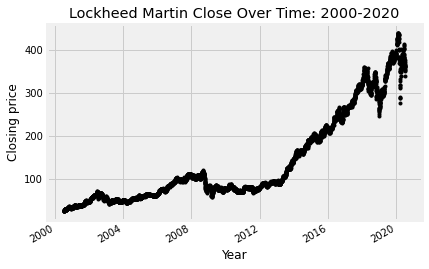

In [13]:
lmt['close'].plot(style='k.')
ax = plt.gca()
ax.set_title("Lockheed Martin Close Over Time: 2000-2020")
ax.set_xlabel("Year")
ax.set_ylabel("Closing price")
plt.savefig("lmttimeseries20002020.png")
plt.show()

## State fragility matrix data import: this is data regarding the stability/fragility of a country

In [14]:
# sfm_df = pd.read_excel('drive/My Drive/SFIv2018.xls')
sfm_df = pd.read_excel('SFIv2018.xls')

sfm_df.head(20)

,scode,country,year,region,sfi,effect,legit,seceff,secleg,poleff,polleg,ecoeff,ecoleg,soceff,socleg
0,AFG,Afghanistan,1995,2,25,13,12,3,3,3,3,4,3,3,3
1,AFG,Afghanistan,1996,2,24,12,12,3,3,2,3,4,3,3,3
2,AFG,Afghanistan,1997,2,24,12,12,3,3,2,3,4,3,3,3
3,AFG,Afghanistan,1998,2,24,12,12,3,3,2,3,4,3,3,3
4,AFG,Afghanistan,1999,2,24,12,12,3,3,2,3,4,3,3,3
5,AFG,Afghanistan,2000,2,24,12,12,3,3,2,3,4,3,3,3
6,AFG,Afghanistan,2001,2,24,12,12,3,3,2,3,4,3,3,3
7,AFG,Afghanistan,2002,2,22,12,10,3,3,2,1,4,3,3,3
8,AFG,Afghanistan,2003,2,22,12,10,3,3,2,1,4,3,3,3
9,AFG,Afghanistan,2004,2,22,12,10,3,3,2,1,4,3,3,3


## Merging state fragility matrix into eda_df

In [15]:
eda_df = eda_df.merge(sfm_df, how='inner', left_on=['COUNTRY', 'YEAR'], right_on=['country', 'year'])

eda_df.head()

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,...,effect,legit,seceff,secleg,poleff,polleg,ecoeff,ecoleg,soceff,socleg
0,Afghanistan,AFG,700,1995,4,1992,9,1996,3,4,...,13,12,3,3,3,3,4,3,3,3
1,Afghanistan,AFG,700,1996,4,1992,9,1996,3,2,...,12,12,3,3,2,3,4,3,3,3
2,Afghanistan,AFG,700,2001,11,2001,6,2002,3,4,...,12,12,3,3,2,3,4,3,3,3
3,Afghanistan,AFG,700,2002,11,2001,6,2002,3,4,...,12,10,3,3,2,1,4,3,3,3
4,Albania,ALB,339,1996,5,1996,5,1996,3,1,...,4,4,0,1,1,1,2,0,1,2


# S: Scrub (Goes here?)

# E: Explore

### TBD: Title and axes labels on all plots

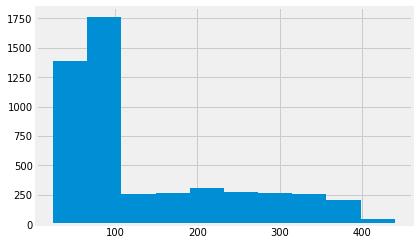

In [16]:
lmt['close'].hist()

## TBD: Plot annotation

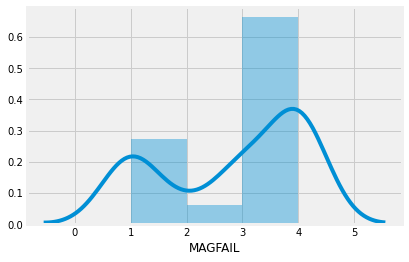

In [17]:
sns.distplot(eda_df['MAGFAIL'])

### Single missing value in MAGCOL ( 9 = missing per codebook)

# TBD: Plot annotation

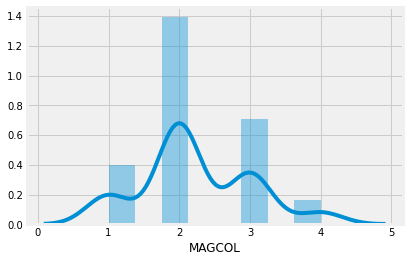

In [18]:
sns.distplot(eda_df['MAGCOL'])

In [19]:
eda_df['MAGCOL'].value_counts()

2    59
3    30
1    17
4     7
Name: MAGCOL, dtype: int64

## Dropping single missing value in MAGCOL

In [20]:
eda_df = eda_df[eda_df['MAGCOL'] != 9]

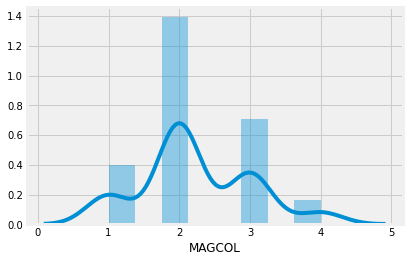

In [21]:
sns.distplot(eda_df['MAGCOL'])

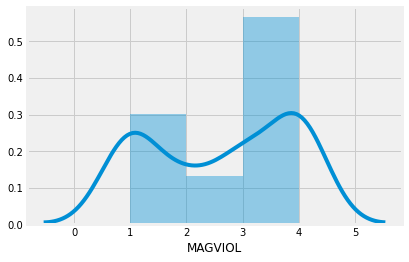

In [22]:
sns.distplot(eda_df['MAGVIOL'])

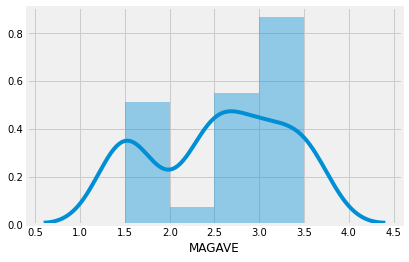

In [23]:
sns.distplot(eda_df['MAGAVE'])

### TBD: Not sure what these represent, consult codebook

In [24]:
eda_df.POLITYX.value_counts()

SF     13
-6      4
-7      4
-9      4
-14     4
-5      3
-10     3
-12     2
-13     2
-8      1
-11     1
DIS     1
Name: POLITYX, dtype: int64

### There are 36 Unique Countries in dataset after manipulation

In [25]:
eda_df.COUNTRY.nunique()

36

## 77 Cumulative Regime Change Years after 2000 after manipulation

In [26]:
len(eda_df[eda_df['YEAR'] > 1999])

77

### Looking at discrete events 2000 on: 

In [27]:
two_thou_df = eda_df[eda_df['YEAR'] > (1999 or np.nan)] 

In [28]:
two_thou_df.head(10)

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,...,effect,legit,seceff,secleg,poleff,polleg,ecoeff,ecoleg,soceff,socleg
2,Afghanistan,AFG,700,2001,11,2001,6,2002,3,4,...,12,12,3,3,2,3,4,3,3,3
3,Afghanistan,AFG,700,2002,11,2001,6,2002,3,4,...,12,10,3,3,2,1,4,3,3,3
13,Bangladesh,BNG,771,2007,1,2007,1,2007,3,1,...,8,6,0,2,2,2,4,0,2,2
14,Bangladesh,BNG,771,2018,2,2018,12,2018,3,1,...,7,4,0,2,2,1,3,0,2,1
17,Burundi,BUI,516,2015,7,2015,7,2015,3,1,...,12,9,2,2,3,3,4,2,3,2
19,Cambodia,CAM,811,2017,11,2017,11,2017,3,1,...,7,3,0,1,2,1,3,0,2,1
20,Central African Republic,CEN,482,2003,3,2003,3,2003,3,1,...,10,7,1,2,2,1,4,1,3,3
21,Central African Republic,CEN,482,2013,3,2013,4,2016,3,4,...,12,12,2,3,3,3,4,3,3,3
22,Central African Republic,CEN,482,2014,3,2013,4,2016,3,4,...,12,12,2,3,3,3,4,3,3,3
23,Central African Republic,CEN,482,2015,3,2013,4,2016,3,3,...,12,12,2,3,3,3,4,3,3,3


In [29]:
len(two_thou_df)

77

In [30]:
len(two_thou_df[two_thou_df.DESC.notna()])

28

In [31]:
two_thou_df.COUNTRY.unique()

array(['Afghanistan', 'Bangladesh', 'Burundi', 'Cambodia',
       'Central African Republic', 'Comoros', 'Fiji', 'Guinea-Bissau',
       'Haiti', 'Iran', 'Iraq', 'Libya', 'Mauritania', 'Madagascar',
       'Mali', 'Nepal', 'Niger', 'Sierra Leone', 'Solomon Islands',
       'Somalia', 'South Sudan', 'Thailand', 'Turkey', 'Ukraine',
       'Venezuela', 'Yemen'], dtype=object)

In [32]:
len(two_thou_df.COUNTRY.unique())

26

Generally there are not that many events going on at once, with the outliers of 2014 and 2015

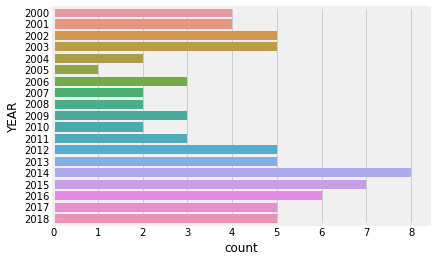

In [33]:
sns.countplot(y= two_thou_df.YEAR)

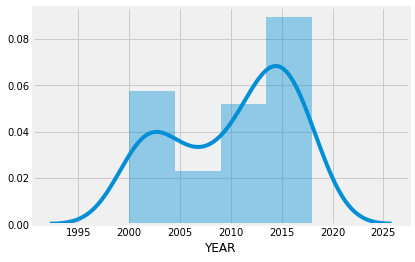

In [34]:
sns.distplot(two_thou_df.YEAR)

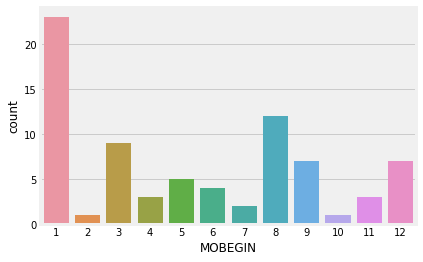

In [35]:
sns.countplot(two_thou_df.MOBEGIN)

## What's this spike around 100?

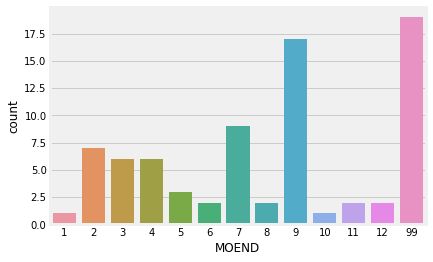

In [36]:
sns.countplot(two_thou_df.MOEND)

In [37]:
ninenine_df = two_thou_df[two_thou_df.MOEND == 99]

In [38]:
ninenine_df

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,...,effect,legit,seceff,secleg,poleff,polleg,ecoeff,ecoleg,soceff,socleg
50,Libya,LIB,620,2011,8,2011,99,9999,3,4,...,5,10,1,3,3,3,1,3,0,1
51,Libya,LIB,620,2012,8,2011,99,9999,3,4,...,5,9,1,2,3,3,1,3,0,1
52,Libya,LIB,620,2013,8,2011,99,9999,3,4,...,5,8,1,2,3,3,1,3,0,0
53,Libya,LIB,620,2014,8,2011,99,9999,3,4,...,5,8,1,2,3,3,1,3,0,0
54,Libya,LIB,620,2015,8,2011,99,9999,3,3,...,5,8,1,2,3,3,1,3,0,0
55,Libya,LIB,620,2016,8,2011,99,9999,3,3,...,5,8,1,2,3,3,1,3,0,0
56,Libya,LIB,620,2017,8,2011,99,9999,3,3,...,5,9,1,3,3,3,1,3,0,0
57,Libya,LIB,620,2018,8,2011,99,9999,3,3,...,5,9,1,3,3,3,1,3,0,0
94,South Sudan,SSU,525,2013,12,2013,99,9999,3,4,...,11,11,2,2,3,3,3,3,3,3
95,South Sudan,SSU,525,2014,12,2013,99,9999,3,4,...,12,12,3,3,3,3,3,3,3,3


## 19 years out of 92 cumulative in the 2000s were still ongoing on collection - TBD: How to deal with these years, coding of 99 would skew analysis

In [39]:
len(ninenine_df)

19

## Somalia stands out as an exceptionally turbulent state

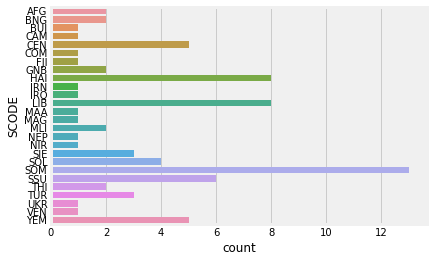

In [40]:
sns.countplot(y=two_thou_df['SCODE'])

## Dropping columns: TBD Rationale from above and EDA

Rationale - 

In [41]:
eda_df = eda_df.drop(['PTYPE', 'DESC2', "COUNTRY", "CCODE", "DESC"],axis=1)

eda_df.columns

Index(['SCODE', 'YEAR', 'MOBEGIN', 'YRBEGIN', 'MOEND', 'YREND', 'MAGFAIL',
       'MAGCOL', 'MAGVIOL', 'MAGAVE', 'POLITYX', 'scode', 'country', 'year',
       'region', 'sfi', 'effect', 'legit', 'seceff', 'secleg', 'poleff',
       'polleg', 'ecoeff', 'ecoleg', 'soceff', 'socleg'],
      dtype='object')

# Focusing on duration - TBD: Survival analysis derived features for events that were short/long compared to the estimated time to death event
- Time of beginning and end of regime change through YRBEGIN, YREND, MOBEGIN, MOEND features are of key interest

## Creating 'time_begin' and 'time_end' features
- These capture both month and year as Pandas datetime features
- Problem: Always set to first day of month, but that's the data for ya!

In [42]:
eda_df['time_begin'] = pd.to_datetime((eda_df['YRBEGIN'].astype(str)  + "-" +eda_df['MOBEGIN'].astype(str)), format='%Y-%m', errors="coerce")
eda_df['time_end'] = pd.to_datetime((eda_df['YREND'].astype(str)  + "-" +eda_df['MOEND'].astype(str)),  errors='coerce')
eda_df['YEAR'] = pd.to_datetime(eda_df['YEAR'].astype(str), errors="coerce")
eda_df.head(10)

,SCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,...,seceff,secleg,poleff,polleg,ecoeff,ecoleg,soceff,socleg,time_begin,time_end
0,AFG,1995-01-01,4,1992,9,1996,4,1,4,3.0,...,3,3,3,3,4,3,3,3,1992-04-01,1996-09-01
1,AFG,1996-01-01,4,1992,9,1996,2,1,2,1.5,...,3,3,2,3,4,3,3,3,1992-04-01,1996-09-01
2,AFG,2001-01-01,11,2001,6,2002,4,1,4,3.0,...,3,3,2,3,4,3,3,3,2001-11-01,2002-06-01
3,AFG,2002-01-01,11,2001,6,2002,4,1,4,3.0,...,3,3,2,1,4,3,3,3,2001-11-01,2002-06-01
4,ALB,1996-01-01,5,1996,5,1996,1,3,1,1.5,...,0,1,1,1,2,0,1,2,1996-05-01,1996-05-01
5,ANG,1995-01-01,5,1992,4,1997,2,1,1,1.5,...,3,3,2,3,3,3,3,3,1992-05-01,1997-04-01
6,ANG,1996-01-01,5,1992,4,1997,2,1,1,1.5,...,3,3,2,3,3,3,3,3,1992-05-01,1997-04-01
7,ANG,1997-01-01,5,1992,4,1997,2,1,1,1.5,...,3,3,2,3,3,2,3,3,1992-05-01,1997-04-01
8,ARM,1995-01-01,7,1995,9,1996,1,2,1,1.5,...,1,0,2,1,3,0,1,0,1995-07-01,1996-09-01
9,ARM,1996-01-01,7,1995,9,1996,1,3,3,2.5,...,1,0,2,0,3,0,1,0,1995-07-01,1996-09-01


- Dropping source beginning and end date columns 

In [43]:
eda_df = eda_df.drop(['MOBEGIN','YRBEGIN','MOEND','YREND'],axis=1)

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SCODE       113 non-null    object        
 1   YEAR        113 non-null    datetime64[ns]
 2   MAGFAIL     113 non-null    int64         
 3   MAGCOL      113 non-null    int64         
 4   MAGVIOL     113 non-null    int64         
 5   MAGAVE      113 non-null    float64       
 6   POLITYX     42 non-null     object        
 7   scode       113 non-null    object        
 8   country     113 non-null    object        
 9   year        113 non-null    int64         
 10  region      113 non-null    int64         
 11  sfi         113 non-null    int64         
 12  effect      113 non-null    int64         
 13  legit       113 non-null    int64         
 14  seceff      113 non-null    int64         
 15  secleg      113 non-null    int64         
 16  poleff      113 non-null  

## Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA

In [44]:
eda_df.time_begin.min()

Timestamp('1990-09-01 00:00:00')

In [45]:
eda_df.time_end.max()

Timestamp('2018-12-01 00:00:00')

# An expanded dataframe of every country with its MAG and composite fragility values(sfi, effect, legit.) Dropping other variables as [Rationale TBD]

In [46]:
#create copy of df at present state
group_df = eda_df.copy()

#drop non numeric columns

group_df = group_df.drop(["POLITYX", "time_begin", "time_end", 'scode', 'country', 'year', 
                          'region',
                          'seceff', 'secleg', 'poleff', 'polleg', 'ecoeff', 'ecoleg', 'soceff',
       'socleg',],axis=1)


# group by country into groupby object
group = group_df.groupby(["SCODE"])

In [47]:
group_df.columns

Index(['SCODE', 'YEAR', 'MAGFAIL', 'MAGCOL', 'MAGVIOL', 'MAGAVE', 'sfi',
       'effect', 'legit'],
      dtype='object')

In [48]:
from functools import reduce

#empty list of dataframes to be populated with groupby objects' dfs when modified
grouped_dfs = []

#iterate over groupby objects' component dataframes
for k in group.groups.keys():
    #reference to dataframe
    gr = group.get_group(k)

    #append 1950 and 2019 as beginning and end years
    gr = gr.append(pd.Series([k,'2019-01-01',0,0,0,0,0,0,0], index=gr.columns),ignore_index=True) #adding first year
    gr.loc[-1] = [k, '2000-01-01', 0,0,0,0,0,0,0]  # adding final year
    gr.index = gr.index + 1  # shifting index to match
    gr.sort_index(inplace=True) #sorting index back to sequential years
    
    #setting index to datetime YEAR with AS(year start) freq, fill empty years with 0
    gr =gr.set_index("YEAR").asfreq('AS')
    gr = gr.fillna(0)
        
    #dropping a weird column that comes up 
    gr = gr.drop('0', axis=1, errors='ignore')
    
    #renaming columns programmatically to not collide in merge, appending name of country to numerical vals
    gr.rename(columns = {'MAGFAIL':'MAGFAIL_'+k, "MAGCOL": "MAGCOL_"+k,"MAGAVE":"MAGAVE_"+k,"MAGVIOL": "MAGVIOL_"+k, "sfi": "sfi_"+k,
                         'effect':'effect_'+k,'legit':'legit_'+k}, inplace = True)
    gr = gr.reset_index()
    
    #add iterated df to dfs list
    grouped_dfs.append(gr)

#merge all dfs on YEAR and set index back to datetime 
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['YEAR'],
                                            how='outer'), grouped_dfs).set_index("YEAR")

# Expanded dataframe with values-by-country

In [49]:
df_merged

,SCODE_x,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,SCODE_y,MAGFAIL_ALB,...,effect_YEM,legit_YEM,SCODE_y,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM
YEAR,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01,AFG,4.0,1.0,4.0,3.0,24.0,12.0,12.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01,AFG,4.0,1.0,4.0,3.0,22.0,12.0,10.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_merged = df_merged.drop(columns=['SCODE_x', 'SCODE_y'],axis=1)

df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,sfi_YEM,effect_YEM,legit_YEM,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM
YEAR,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01,4.0,1.0,4.0,3.0,24.0,12.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01,4.0,1.0,4.0,3.0,22.0,12.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Resampling to business daily frequency to match the stock market and forward filling in NaN values

In [51]:
df_merged = df_merged.resample("B").ffill()
df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,sfi_YEM,effect_YEM,legit_YEM,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM
YEAR,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_merged.index = df_merged.index.rename("ds")

In [53]:
df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,sfi_YEM,effect_YEM,legit_YEM,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM
ds,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering dates and polynomials-

In [54]:
df_merged['Year'] = df_merged.index.year - np.min(df_merged.index.year)
df_merged['Month'] = df_merged.index.month

df_merged.head()

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,legit_YEM,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM,Year,Month
ds,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [55]:
date_features = ['Year', 'Month']

In [56]:
polynomial_terms = [2,3]
for feature in date_features:
    for i in polynomial_terms:
        df_merged[feature+'**'+str(i)] = df_merged[feature]**i
df_merged.head()

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,12,0,0,144,1728
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1


## TBD: EDA and Preprocess, Feature Engineering

In [57]:
stock_regime_df = df_merged['2000-07-07':'2018-12-31']

stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728


In [58]:
stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,...,MAGAVE_ZAM,sfi_ZAM,effect_ZAM,legit_ZAM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,12,361,6859,144,1728


## Dropping columns of all 0s that don't contain information

In [59]:
stock_regime_df = stock_regime_df.loc[:, (stock_regime_df != 0).any(axis=0)]

stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_BNG,MAGCOL_BNG,MAGVIOL_BNG,...,MAGAVE_YEM,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728


## Trimming LMT data to just 2000-2019 [TBD: Why?]

In [60]:
trunc_lmt = lmt.copy()

In [61]:
trunc_lmt

,ds,open,high,low,close,volume
ds,,,,,,
2000-07-07,2000-07-07,25.13,25.38,24.81,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.44,25.00,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.06,24.56,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.19,24.19,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.06,25.00,25.00,836100.0
...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
trunc_lmt = trunc_lmt['2000-07-07':'2019-01-01']

trunc_lmt

,ds,open,high,low,close,volume
ds,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0
...,...,...,...,...,...,...
2018-12-24,2018-12-24,253.03,254.6300,245.0100,245.22,1515428.0
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0


In [63]:
trunc_lmt = trunc_lmt.asfreq("B")
trunc_lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='ds', length=4822, freq='B')

In [64]:
trunc_lmt

,ds,open,high,low,close,volume
ds,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0
...,...,...,...,...,...,...
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0


# CORE DATASET - lmt_df: Merging LMT stock and trimmed adverse regime change data/state fragility data

In [65]:
trunc_lmt.head()

,ds,open,high,low,close,volume
ds,,,,,,
2000-07-07,2000-07-07,25.13,25.38,24.81,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.44,25.00,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.06,24.56,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.19,24.19,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.06,25.00,25.00,836100.0


In [66]:
lmt_df = pd.merge(trunc_lmt, stock_regime_df, left_index=True, right_index=True)

lmt_df

,ds,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,...,MAGAVE_YEM,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728


In [67]:
lmt_df.drop('ds', axis=1, inplace=True)

lmt_df

,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,...,MAGAVE_YEM,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,7,1,1,49,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728
2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,0.0,...,3.5,21.0,10.0,11.0,19,12,361,6859,144,1728


In [68]:
lmt_df.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='ds', length=4822, freq='B')

## Creation of MEAN_AVE Variable out of Magnitude Averages across Countries

This variable is key, depicting the overall turbulence/authoritarian shift magnitude throughout the world at a given point.

In [69]:
ave_col = [col for col in lmt_df.columns if 'MAGAVE' in col]

ave_col

['MAGAVE_AFG',
 'MAGAVE_BNG',
 'MAGAVE_BUI',
 'MAGAVE_CAM',
 'MAGAVE_CEN',
 'MAGAVE_COM',
 'MAGAVE_FJI',
 'MAGAVE_GNB',
 'MAGAVE_HAI',
 'MAGAVE_IRN',
 'MAGAVE_IRQ',
 'MAGAVE_LIB',
 'MAGAVE_MAA',
 'MAGAVE_MAG',
 'MAGAVE_MLI',
 'MAGAVE_NEP',
 'MAGAVE_NIR',
 'MAGAVE_SIE',
 'MAGAVE_SOL',
 'MAGAVE_SOM',
 'MAGAVE_SSU',
 'MAGAVE_THI',
 'MAGAVE_TUR',
 'MAGAVE_UKR',
 'MAGAVE_VEN',
 'MAGAVE_YEM']

In [70]:
lmt_df['mean_ave'] = lmt_df[ave_col].mean(axis=1)

lmt_df.head(10)

,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,...,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3,mean_ave
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.38,24.81,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-10,25.31,25.44,25.00,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-11,24.94,25.06,24.56,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-12,24.19,25.19,24.19,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-13,25.06,26.06,25.00,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-14,25.88,26.56,25.81,26.38,1902000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-17,26.50,26.50,25.25,25.38,1216800.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-18,25.50,25.50,24.94,25.31,1261200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-19,25.25,25.44,24.88,25.38,900000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846


In [71]:
lmt_df.isnull().sum()

open        172
high        172
low         172
close       172
volume      172
           ... 
Year**2       0
Year**3       0
Month**2      0
Month**3      0
mean_ave      0
Length: 194, dtype: int64

In [72]:
lmt_df = lmt_df.dropna()

lmt_df.isnull().sum()

open        0
high        0
low         0
close       0
volume      0
           ..
Year**2     0
Year**3     0
Month**2    0
Month**3    0
mean_ave    0
Length: 194, dtype: int64

## Dropping all but close financial data

Rationale: I am looking to focus on one target variable for the financial aspects, and closing price makes the other financial variables not needed as I am looking to model with regime change/fragility features and not stock features.

In [73]:
lmt_df = lmt_df.drop(columns=['open', 'high', 'low', 'volume'],axis=1)

lmt_df.head()

,close,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_BNG,MAGCOL_BNG,...,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3,mean_ave
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-10,25.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-11,24.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-12,25.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846
2000-07-13,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,7,1,1,49,343,0.403846


## Creating DF/TS of just close and date

In [74]:
lmt_cl_df = lmt_df[['close']]

lmt_cl_df

,close
ds,
2000-07-07,25.31
2000-07-10,25.19
2000-07-11,24.75
2000-07-12,25.06
2000-07-13,25.00
...,...
2018-12-24,245.22
2018-12-26,251.62
2018-12-27,259.79


In [75]:
lmt_cl_df.asfreq("B")

lmt_cl_df.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='ds', length=4650, freq=None)

In [76]:
lmt_cl_df.isnull().sum()

close    0
dtype: int64

# Plotting mean average of intensity across nations and closing price of LMT

## Kinda looks like a lag and then some correlation honestly! How about we shift it around and find out.

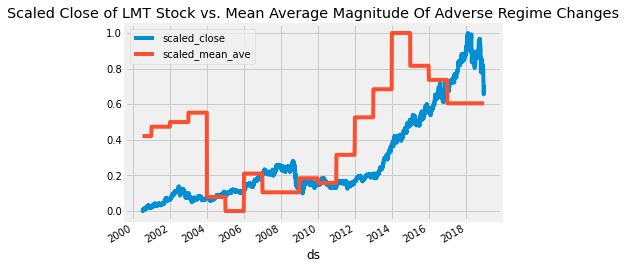

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scale_df = lmt_df.copy()
scaler = MinMaxScaler()
scale_df['scaled_close'] = scaler.fit_transform(lmt_df['close'].values.reshape(-1,1))
scale_df['scaled_mean_ave'] = scaler.fit_transform(lmt_df['mean_ave'].values.reshape(-1,1))

scale_df[['scaled_close', 'scaled_mean_ave']].plot()
plt.title("Scaled Close of LMT Stock vs. Mean Average Magnitude Of Adverse Regime Changes")
plt.savefig("closevsmagave.png")

plt.show()

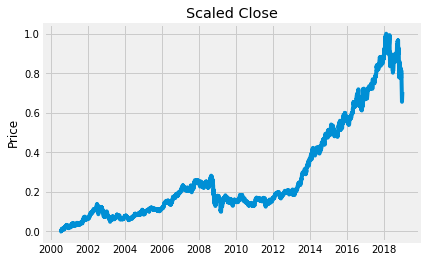

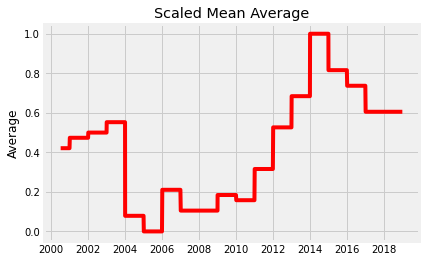

In [78]:
plt.plot(scale_df.index, scale_df['scaled_close'])
plt.title('Scaled Close')
plt.ylabel('Price');
plt.show()

plt.plot(scale_df.index, scale_df['scaled_mean_ave'], 'r')
plt.title('Scaled Mean Average')
plt.ylabel('Average');
plt.show();

# Time shifting mean_ave data only and merging back for causality test with stock data

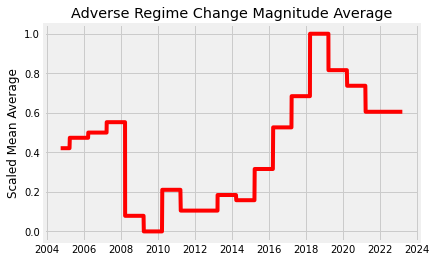

In [79]:
scale_mean_df = scale_df['scaled_mean_ave'].copy()
scale_mean_df = scale_mean_df.tshift(periods=1100,freq="B")

plt.plot(scale_mean_df, 'r')
plt.title('Adverse Regime Change Magnitude Average')
plt.ylabel('Scaled Mean Average');
plt.show();

In [80]:
scale_mean_df.head()

ds
2004-09-24    0.421053
2004-09-27    0.421053
2004-09-28    0.421053
2004-09-29    0.421053
2004-09-30    0.421053
Name: scaled_mean_ave, dtype: float64

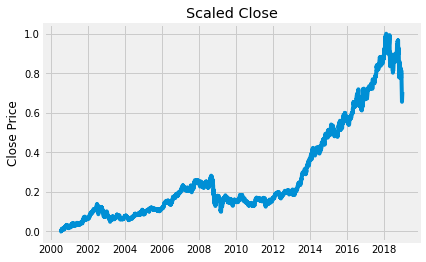

In [81]:
scale_close_df = scale_df['scaled_close'].copy()
plt.plot(scale_close_df)
plt.title('Scaled Close')
plt.ylabel('Close Price');
plt.show()

In [82]:
scale_mean_df.head()

ds
2004-09-24    0.421053
2004-09-27    0.421053
2004-09-28    0.421053
2004-09-29    0.421053
2004-09-30    0.421053
Name: scaled_mean_ave, dtype: float64

In [83]:
scale_close_df

ds
2000-07-07    0.001665
2000-07-10    0.001309
2000-07-11    0.000000
2000-07-12    0.000922
2000-07-13    0.000743
                ...   
2018-12-24    0.655673
2018-12-26    0.674706
2018-12-27    0.699004
2018-12-28    0.703375
2018-12-31    0.705100
Name: scaled_close, Length: 4650, dtype: float64

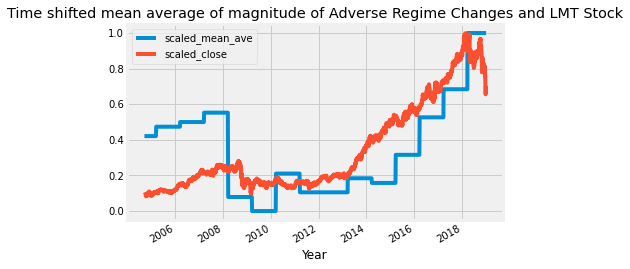

In [84]:
tshift_df = pd.merge( scale_mean_df,scale_close_df, left_index=True, right_index=True)

tshift_df.plot()
plt.title("Time shifted mean average of magnitude of Adverse Regime Changes and LMT Stock")
plt.xlabel("Year")
plt.savefig("shiftedseries.png")

plt.show()

## Granger causality test on the time shifted mean_ave and scaled_close indicates causality!

In [85]:
grangercausalitytests(tshift_df[['scaled_mean_ave','scaled_close']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3444  , p=0.0068  , df_denom=3456, df_num=1
ssr based chi2 test:   chi2=7.3508  , p=0.0067  , df=1
likelihood ratio test: chi2=7.3430  , p=0.0067  , df=1
parameter F test:         F=7.3444  , p=0.0068  , df_denom=3456, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9890  , p=0.0186  , df_denom=3453, df_num=2
ssr based chi2 test:   chi2=7.9896  , p=0.0184  , df=2
likelihood ratio test: chi2=7.9804  , p=0.0185  , df=2
parameter F test:         F=3.9890  , p=0.0186  , df_denom=3453, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9061  , p=0.0334  , df_denom=3450, df_num=3
ssr based chi2 test:   chi2=8.7359  , p=0.0330  , df=3
likelihood ratio test: chi2=8.7249  , p=0.0332  , df=3
parameter F test:         F=2.9061  , p=0.0334  , df_denom=3450, df_num=3


## Creating shift_df: shifted dataframe without scaling for modeling with train-test scaling split later

In [86]:
shift_df = lmt_df.copy()
shift_mean_df = shift_df['mean_ave'].copy().tshift(periods=1100,freq="B")
shift_close_df = shift_df['close'].copy()
shift_df = pd.merge( shift_mean_df,shift_close_df, left_index=True, right_index=True)

shift_df

,mean_ave,close
ds,,
2004-09-24,0.403846,54.36
2004-09-27,0.403846,54.64
2004-09-28,0.403846,55.50
2004-09-29,0.403846,55.09
2004-09-30,0.403846,55.78
...,...,...
2018-12-24,0.826923,245.22
2018-12-26,0.826923,251.62
2018-12-27,0.826923,259.79


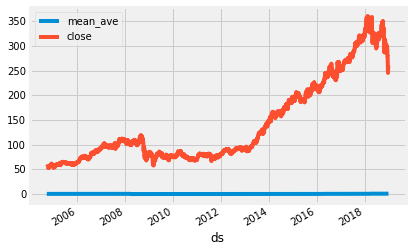

In [87]:
shift_df.plot()

# EDA of stock data - Lockheed Martin

## Seasonal decomposition TBD: broken

In [88]:
# lmt_df.index

In [89]:
# # Import and apply seasonal_decompose()
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(lmt_df['close'])
# # Gather the trend, seasonality, and residuals 
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid
# # Plot gathered statistics
# plt.figure(figsize=(12,8))
# plt.subplot(411)
# plt.plot(df, label='Original', color='blue')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend', color='blue')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='Seasonality', color='blue')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals', color='blue')
# plt.legend(loc='best')
# plt.tight_layout()


## Slicing out 2014 on for visual spot check, upward trend

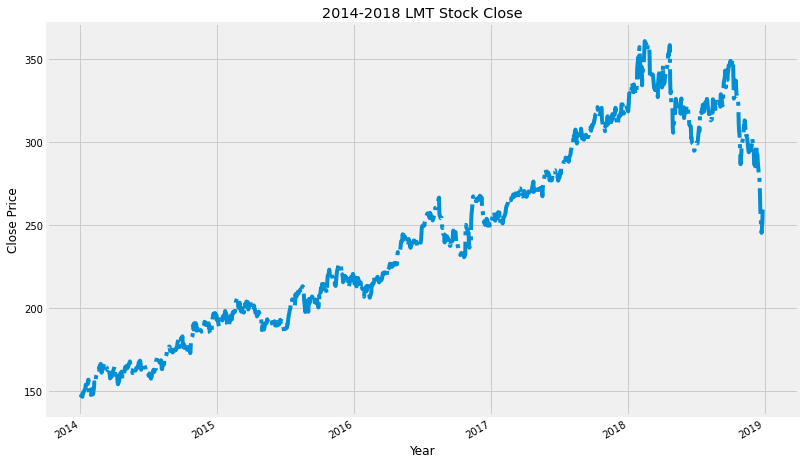

In [90]:
lmt_df['close']['2014-01-01':'2018-12-31'].plot(figsize=(12,8),ls='-.')
plt.title("2014-2018 LMT Stock Close")
plt.ylabel("Close Price")
plt.xlabel("Year")
plt.show()

## TBD: Examine by yearly time slices
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [91]:
# groups = lmt_df['close'].groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# groups.plot(subplots=True, legend=False)
# plt.show()

## Stationarity checks

In [92]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput
#     return dftest

### Closing clearly ain't stationary

Results of Dickey-Fuller Test:
Test Statistic                   -0.080670
p-value                           0.951330
#Lags Used                       12.000000
Number of Observations Used    4637.000000
Critical Value (1%)              -3.431761
Critical Value (5%)              -2.862164
Critical Value (10%)             -2.567102
sig                               0.000000
dtype: float64


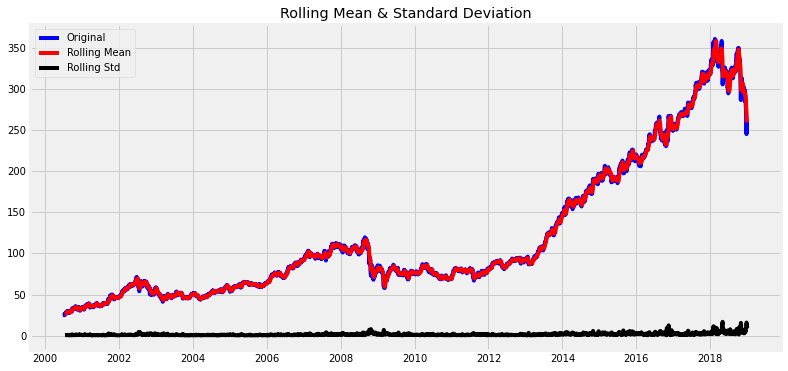

In [93]:
res = stationarity_check(lmt_cl_df['close']);

### Neither is the mean ave? TBD

In [94]:
# res2 = stationarity_check(mav_df)

## first_df = copy of lmt_df

In [95]:
first_df = lmt_df.copy()

first_df = first_df[['mean_ave','close']]

first_df

,mean_ave,close
ds,,
2000-07-07,0.403846,25.31
2000-07-10,0.403846,25.19
2000-07-11,0.403846,24.75
2000-07-12,0.403846,25.06
2000-07-13,0.403846,25.00
...,...,...
2018-12-24,0.538462,245.22
2018-12-26,0.538462,251.62
2018-12-27,0.538462,259.79


## diff_df -> First order differencing towards stationary data of close and mean_ave

Results of Dickey-Fuller Test:
Test Statistic                  -19.715735
p-value                           0.000000
#Lags Used                       11.000000
Number of Observations Used    4638.000000
Critical Value (1%)              -3.431761
Critical Value (5%)              -2.862163
Critical Value (10%)             -2.567102
sig                               1.000000
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -68.169812
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    4649.000000
Critical Value (1%)              -3.431757
Critical Value (5%)              -2.862162
Critical Value (10%)             -2.567101
sig                               1.000000
dtype: float64


Test Statistic                  -68.169812
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    4649.000000
Critical Value (1%)              -3.431757
Critical Value (5%)              -2.862162
Critical Value (10%)             -2.567101
sig                               1.000000
dtype: float64

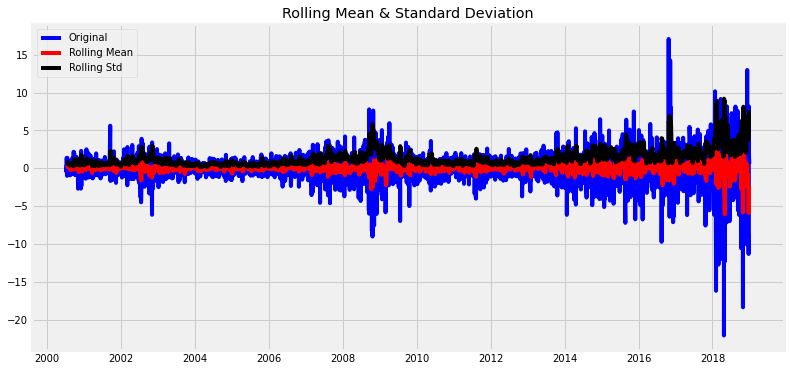

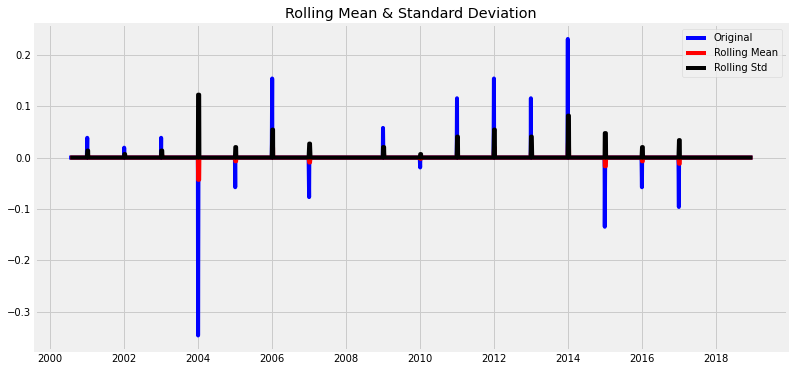

In [96]:
diff_df = first_df.copy()

diff_df = diff_df.diff(1)

diff_df = diff_df.bfill()

stationarity_check(diff_df['close']);
stationarity_check(diff_df['mean_ave'])

## This looks like no causality w/Granger still without time shifting

In [97]:
grangercausalitytests(diff_df[['mean_ave','close']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9405  , p=0.3322  , df_denom=4646, df_num=1
ssr based chi2 test:   chi2=0.9411  , p=0.3320  , df=1
likelihood ratio test: chi2=0.9410  , p=0.3320  , df=1
parameter F test:         F=0.9405  , p=0.3322  , df_denom=4646, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4878  , p=0.6140  , df_denom=4643, df_num=2
ssr based chi2 test:   chi2=0.9767  , p=0.6136  , df=2
likelihood ratio test: chi2=0.9766  , p=0.6137  , df=2
parameter F test:         F=0.4878  , p=0.6140  , df_denom=4643, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3253  , p=0.8071  , df_denom=4640, df_num=3
ssr based chi2 test:   chi2=0.9773  , p=0.8068  , df=3
likelihood ratio test: chi2=0.9772  , p=0.8068  , df=3
parameter F test:         F=0.3253  , p=0.8071  , df_denom=4640, df_num=3


## TBD: Seasonal decomposition of differenced close price

In [98]:
# result = seasonal_decompose(diff_df['close'], period=365)
# # dec = seasonal_decompose(lmt_df.close, period=365, model='mul')
# result.plot();

## Lag plotting shows strong autocorrelation in the close price and less in the mean average, suggesting an autoregressive approach is in order

# TBD: Axis labels/titles

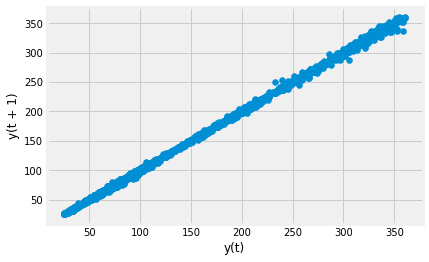

In [99]:
from pandas.plotting import lag_plot

lag_plot(lmt_df['close'])

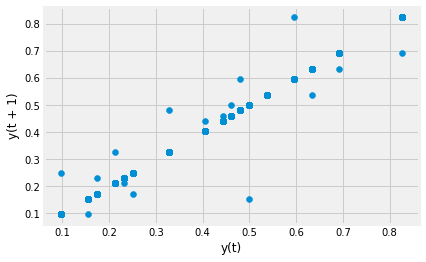

In [100]:
lag_plot(lmt_df['mean_ave'])

# M: Modeling, Forecasting and comparisons

## Baseline Modeling on differenced dataframe for comparisons
Source: Machinelearningmastery

In [101]:
values = pd.DataFrame(diff_df.close.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN -0.12
1 -0.12 -0.12
2 -0.12 -0.44
3 -0.44  0.31
4  0.31 -0.06


In [102]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [103]:
# sc = MinMaxScaler()

# train_X = sc.fit_transform(train_X)
# train_y = sc.fit_transform(train_y)
# test_X = sc.transform(test_X)
# test_y = sc.transform(test_y)

In [104]:
def model_persistence(x):
    return x

# Persistence model results on diff_df: RMSE of 3.64

In [105]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 3.639


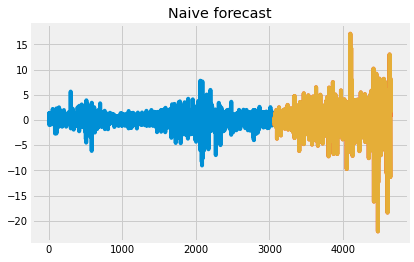

In [106]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.title("Naive forecast")
plt.savefig("naive_forecast.png")
plt.show()

## Baseline modeling on time shifted, scaled data

In [107]:
values = pd.DataFrame(shift_df.close.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1    t+1
0    NaN  54.36
1  54.36  54.64
2  54.64  55.50
3  55.50  55.09
4  55.09  55.78


In [108]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [109]:
sc = MinMaxScaler()

train_X = sc.fit_transform(train_X.reshape(-1,1))
train_y = sc.fit_transform(train_y.reshape(-1,1))
test_X = sc.transform(test_X.reshape(-1,1))
test_y = sc.transform(test_y.reshape(-1,1))

In [110]:
def model_persistence(x):
    return x

## RMSE on shifted, scaled data of persistence modeling: 0.026!?

In [111]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 0.026


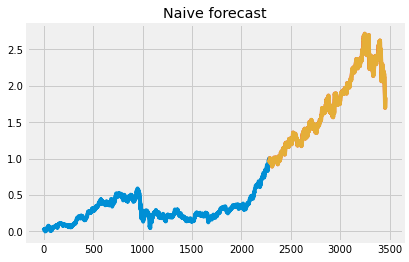

In [112]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.title("Naive forecast")
plt.savefig("naive_forecast.png")
plt.show()

# Linear Modeling

## VAR

In [113]:
from statsmodels.tsa.api import VAR

In [114]:
len(diff_df)

4650

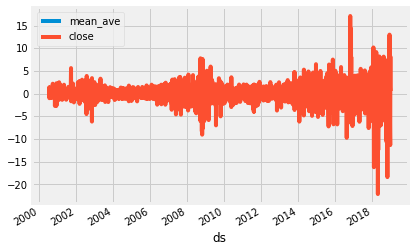

In [115]:
diff_df.plot()

In [116]:
nobs = 365 * 2

In [117]:
train, test = diff_df[0:-nobs], diff_df[-nobs:]

In [118]:
print(train.shape)
print(test.shape)

(3920, 2)
(730, 2)


In [119]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -8.98767872723397
BIC:  -8.978073840581967

Order = 2
AIC:  -8.985515329897662
BIC:  -8.96950375103471

Order = 3
AIC:  -8.983590141662754
BIC:  -8.961169120812276

Order = 4
AIC:  -8.98214168771346
BIC:  -8.953308473192084

Order = 5
AIC:  -8.98143364905762
BIC:  -8.946185487273366

Order = 6
AIC:  -8.980099112628185
BIC:  -8.938433248078656

Order = 7
AIC:  -8.977935409234052
BIC:  -8.929849084504609



In [120]:
model.endog_names

['mean_ave', 'close']

In [121]:
results = model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Aug, 2020
Time:                     13:49:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.92985
Nobs:                     3913.00    HQIC:                  -8.96087
Log likelihood:           6490.72    FPE:                0.000126163
AIC:                     -8.97794    Det(Omega_mle):     0.000125201
--------------------------------------------------------------------
Results for equation mean_ave
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000044         0.000137            0.322           0.747
L1.mean_ave        -0.000183         0.016017           -0.011           0.991
L1.close            0.000132         0.000104            1.259   

In [122]:
lag_order = results.k_ar
lag_order

7

In [123]:
z = results.forecast(y=train.values[-lag_order:], steps=nobs)
z

array([[ 7.16155886e-04, -3.23284973e-02],
       [ 9.41992852e-05, -3.61458990e-02],
       [-4.21780468e-05, -5.54182778e-02],
       ...,
       [ 5.91862157e-05,  4.75945300e-02],
       [ 5.91862157e-05,  4.75945300e-02],
       [ 5.91862157e-05,  4.75945300e-02]])

In [124]:
train

,mean_ave,close
ds,,
2000-07-07,0.0,-0.12
2000-07-10,0.0,-0.12
2000-07-11,0.0,-0.44
2000-07-12,0.0,0.31
2000-07-13,0.0,-0.06
...,...,...
2016-02-01,0.0,-1.20
2016-02-02,0.0,0.65
2016-02-03,0.0,2.47


In [125]:
test

,mean_ave,close
ds,,
2016-02-08,0.0,2.59
2016-02-09,0.0,1.45
2016-02-10,0.0,-2.03
2016-02-11,0.0,-6.77
2016-02-12,0.0,-1.10
...,...,...
2018-12-24,0.0,-11.33
2018-12-26,0.0,6.40
2018-12-27,0.0,8.17


In [126]:
idx = pd.date_range('12/01/2016', periods=nobs, freq='B')
df_forecast = pd.DataFrame(z, index=idx, columns=['mean_ave','close'])
df_forecast

,mean_ave,close
2016-12-01,0.000716,-0.032328
2016-12-02,0.000094,-0.036146
2016-12-05,-0.000042,-0.055418
2016-12-06,0.000317,0.133259
2016-12-07,-0.000183,0.014795
...,...,...
2019-09-12,0.000059,0.047595
2019-09-13,0.000059,0.047595
2019-09-16,0.000059,0.047595
2019-09-17,0.000059,0.047595


In [127]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc

df_results = invert_transformation(train, df_forecast)

df_results

,mean_ave,close,mean_ave_forecast,close_forecast
2016-12-01,0.000716,-0.032328,0.000716,1.697672
2016-12-02,0.000094,-0.036146,0.000810,1.661526
2016-12-05,-0.000042,-0.055418,0.000768,1.606107
2016-12-06,0.000317,0.133259,0.001085,1.739366
2016-12-07,-0.000183,0.014795,0.000902,1.754162
...,...,...,...,...
2019-09-12,0.000059,0.047595,0.043708,36.053286
2019-09-13,0.000059,0.047595,0.043768,36.100881
2019-09-16,0.000059,0.047595,0.043827,36.148475
2019-09-17,0.000059,0.047595,0.043886,36.196070


### Source: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

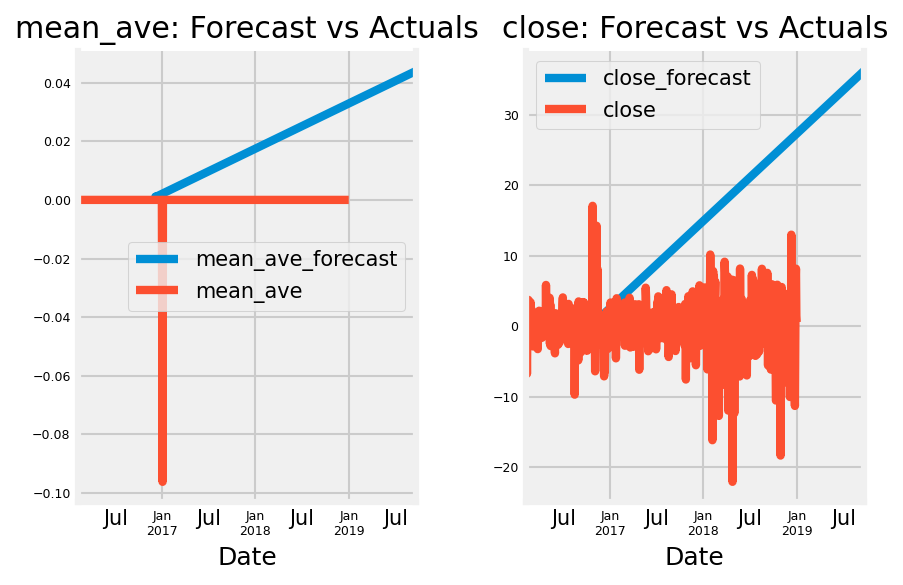

In [128]:
fig, axes = plt.subplots(nrows=int(len(diff_df.columns)/2), ncols=2, dpi=150, figsize=(6,4))
for i, (col,ax) in enumerate(zip(diff_df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xlabel("Date")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.savefig("hilarious.png")
plt.tight_layout();

### Linear modeling with VAR achieves slightly better than baseline modeling on the same data with 3.391 RMSE

In [129]:
RMSE1 = rmse(diff_df['close'][-nobs:], df_results['close'])
print(f'Close VAR(7) RMSE: {RMSE1:.3f}')

Close VAR(7) RMSE: 3.391


# Linear Regression, TBD: Incomplete

In [130]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV(cv=20).fit(lmt_df.drop('close',axis=1).loc[:'01-01-02017'],lmt_df['close'].loc[:'01-01-02017'])

In [131]:
## view features selected
selected_features = pd.DataFrame()
selected_features['Feature'] = lmt_df.drop('close',axis=1).columns[reg.coef_>0]
selected_features['Coefficient'] = reg.coef_[reg.coef_>0]
selected_features

,Feature,Coefficient
0,sfi_BNG,1.988056
1,MAGFAIL_FJI,8.680417
2,MAGCOL_MAA,8.039516
3,effect_NEP,1.028450
4,MAGCOL_TUR,14.555135
5,MAGVIOL_YEM,13.215212
6,Year,2.122466
7,Month,0.798557
8,Year**2,0.058370


In [132]:
sel_features = selected_features['Feature'].values

In [133]:
test_period = 4148

In [134]:
# ## create and populate forecast dataframe
# forecast_df = first_df.copy()
# for datetime, date in zip(first_df.index[-test_period:], range(len(first_df)-test_period, len(first_df))):
#     values = []
#     ## add datetime components
#     values.append(first_df.index.year - np.min(first_df.index.year))
#     values.append( first_df.index.month)

#     ## add polynomial terms of datetime components
#     for feature in date_features:
#         for i in polynomial_terms:
#             values.append((forecast_df[feature][date])**i)
#     ## add previous values and polynomial terms of previous values
#     for i in range(1,previous_values_range):
#         values.append(forecast_df['value'][date-i])
#         for j in polynomial_terms:
#             values.append((forecast_df['value'][date-i])**j)
#     ## make prediction on current datetime
#     forecast = reg.predict(np.array(values).reshape(1,-1))
#     ## append prediction to start of values array
#     values.insert(0, forecast[0])
#     ## set forecast row in dataframe
#     forecast_df.loc[datetime] = values

## Facebook Prophet
Univariate Prophet( source: https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet )

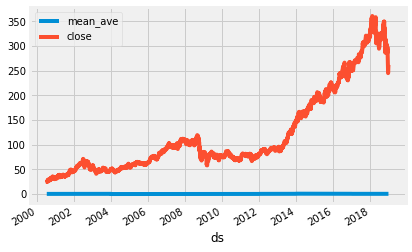

In [135]:
first_df.plot()

In [136]:
first_df.head()

,mean_ave,close
ds,,
2000-07-07,0.403846,25.31
2000-07-10,0.403846,25.19
2000-07-11,0.403846,24.75
2000-07-12,0.403846,25.06
2000-07-13,0.403846,25.00


In [137]:
pro_df = first_df.copy().rename(columns={"close":'y'})

pro_df.head()

,mean_ave,y
ds,,
2000-07-07,0.403846,25.31
2000-07-10,0.403846,25.19
2000-07-11,0.403846,24.75
2000-07-12,0.403846,25.06
2000-07-13,0.403846,25.00


In [138]:
pro_df.drop("mean_ave",inplace=True,axis=1)

pro_df.head()

,y
ds,
2000-07-07,25.31
2000-07-10,25.19
2000-07-11,24.75
2000-07-12,25.06
2000-07-13,25.00


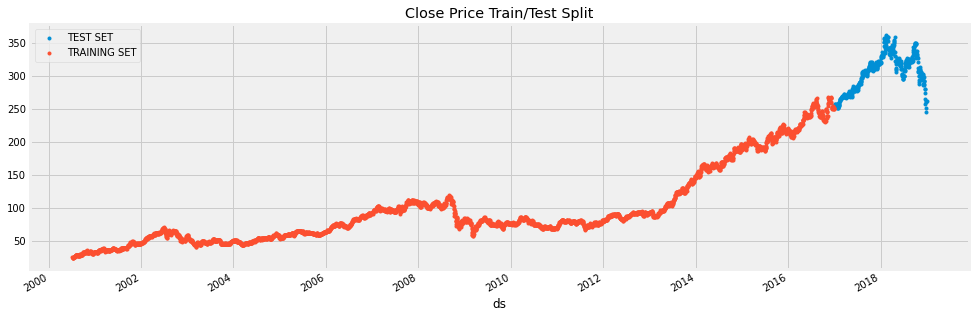

In [139]:
split_date = '01-Jan-2017'

pro_train = pro_df.loc[pro_df.index <= split_date].copy()
pro_test = pro_df.loc[pro_df.index > split_date].copy()

pro_test.rename(columns={'y': 'TEST SET'}).join(pro_train.rename(columns={'y': 'TRAINING SET'}),
          how='outer').plot(figsize=(15,5), title='Close Price Train/Test Split', style='.')
plt.show()

In [140]:
model = Prophet()
model.fit(pro_train.reset_index())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [141]:
pro_test_fcst = model.predict(df=pro_test.reset_index())

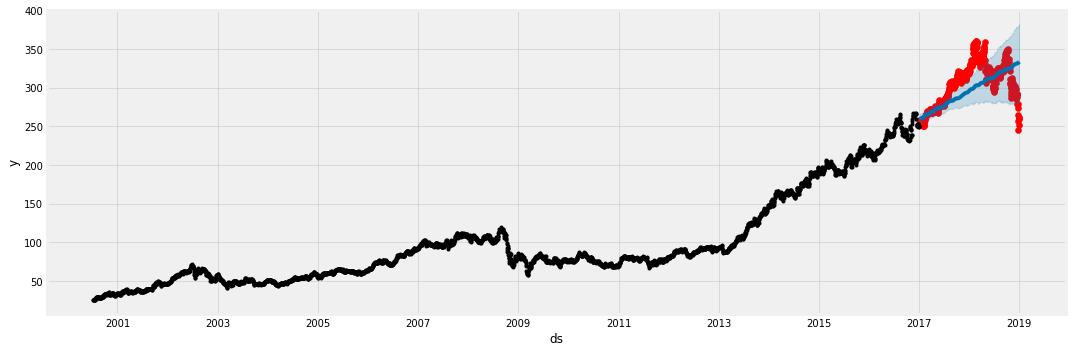

In [142]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pro_test.index, pro_test['y'], color='r')
fig = model.plot(pro_test_fcst, ax=ax)

In [143]:
np.sqrt(mean_squared_error(y_true=pro_test['y'],
                   y_pred=pro_test_fcst['yhat']))

23.729305698642456

## Multivariate Prophet

In [304]:
pro_2_df = first_df.copy().rename(columns={"close":'y', 'mean_ave': "add1"})

pro_2_df.head()

,add1,y
ds,,
2000-07-07,0.403846,25.31
2000-07-10,0.403846,25.19
2000-07-11,0.403846,24.75
2000-07-12,0.403846,25.06
2000-07-13,0.403846,25.00


In [305]:
split_date = '01-Jan-2017'

pro2_train = pro_2_df.loc[pro_2_df.index <= split_date].copy()
pro2_test = pro_2_df.loc[pro_2_df.index > split_date].copy()

# pro2_test.rename(columns={'y': 'TEST SET'}).join(pro2_train.rename(columns={'y': 'TRAINING SET'}),
#           how='outer').plot(figsize=(15,5), title='Close Price Train/Test Split', style='.')
# plt.show()

In [306]:
model = Prophet()
model.add_regressor('add1')
model.fit(pro2_train.reset_index())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [307]:
pro2_test_fcst = model.predict(df=pro2_test.reset_index())

In [308]:
np.sqrt(mean_squared_error(y_true=pro2_test['y'],
                   y_pred=pro2_test_fcst['yhat']))

24.826073501708805

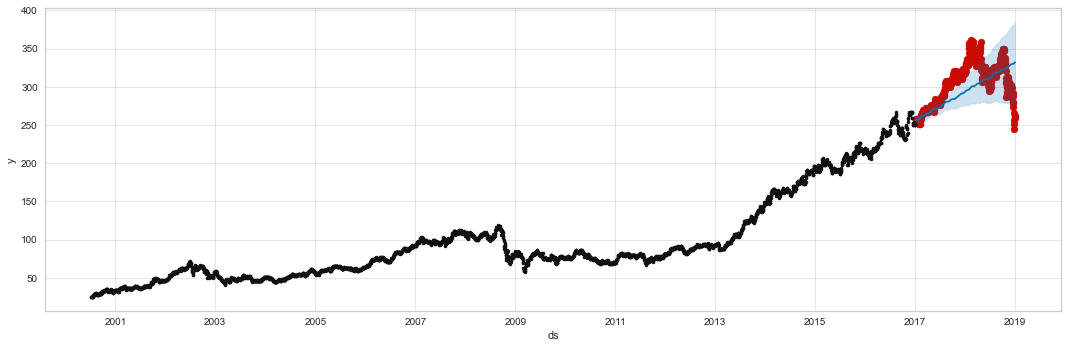

In [309]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pro2_test.index, pro2_test['y'], color='r')
fig = model.plot(pro2_test_fcst, ax=ax)
plt.savefig('prophet_results.png')
plt.show()

## Off differenced dataframe

In [150]:
pro_2_df = diff_df.copy().rename(columns={"close":'y', 'mean_ave': "add1"})

pro_2_df.head()

,add1,y
ds,,
2000-07-07,0.0,-0.12
2000-07-10,0.0,-0.12
2000-07-11,0.0,-0.44
2000-07-12,0.0,0.31
2000-07-13,0.0,-0.06


In [151]:
split_date = '01-Jan-2017'

pro2_train = pro_2_df.loc[pro_2_df.index <= split_date].copy()
pro2_test = pro_2_df.loc[pro_2_df.index > split_date].copy()

# pro2_test.rename(columns={'y': 'TEST SET'}).join(pro2_train.rename(columns={'y': 'TRAINING SET'}),
#           how='outer').plot(figsize=(15,5), title='Close Price Train/Test Split', style='.')
# plt.show()

In [152]:
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.fit(pro2_train.reset_index())

In [153]:
pro2_test_fcst = model.predict(df=pro2_test.reset_index())

In [154]:
np.sqrt(mean_squared_error(y_true=pro2_test['y'],
                   y_pred=pro2_test_fcst['yhat']))

3.7129199457450923

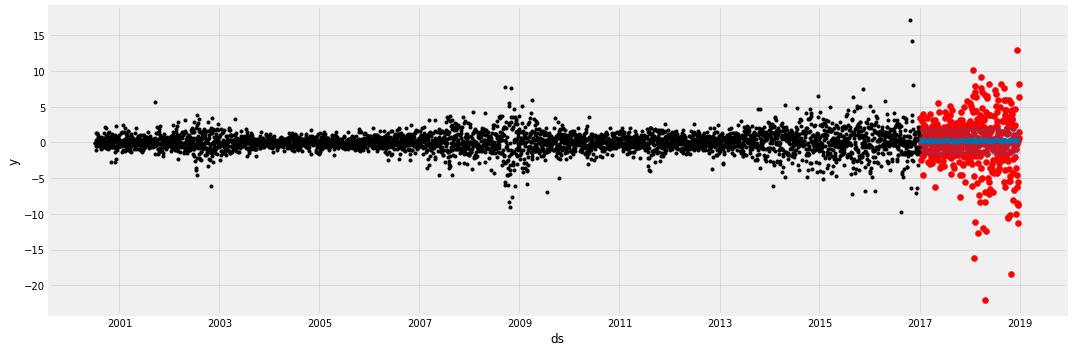

In [155]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pro2_test.index, pro2_test['y'], color='r')
fig = model.plot(pro2_test_fcst, ax=ax)

## XGBoost - starting with multivariate (mean_ave and close) predictions

In [156]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [157]:
xg_df = diff_df.copy()


split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

In [158]:
xg_df.head()

,mean_ave,close
ds,,
2000-07-07,0.0,-0.12
2000-07-10,0.0,-0.12
2000-07-11,0.0,-0.44
2000-07-12,0.0,0.31
2000-07-13,0.0,-0.06


In [159]:
# X_train = xg_train.drop("close",axis=1)
# X_test = xg_test.drop("close",axis=1)

# y_train = xg_train['close']
# y_test = xg_test['close']

X_train = xg_train
X_test = xg_test

y_train = xg_train['close']
y_test = xg_test['close']

In [160]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(X_test)

In [161]:
X_train

array([[0.6       , 0.35818114],
       [0.6       , 0.35818114],
       [0.6       , 0.34625419],
       ...,
       [0.6       , 0.31494596],
       [0.6       , 0.40029817],
       [0.6       , 0.33842713]])

In [162]:
y_test

ds
2017-01-03     3.37
2017-01-04     0.68
2017-01-05     1.99
2017-01-06     1.87
2017-01-09    -0.04
              ...  
2018-12-24   -11.33
2018-12-26     6.40
2018-12-27     8.17
2018-12-28     1.47
2018-12-31     0.58
Name: close, Length: 502, dtype: float64

In [163]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[13:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

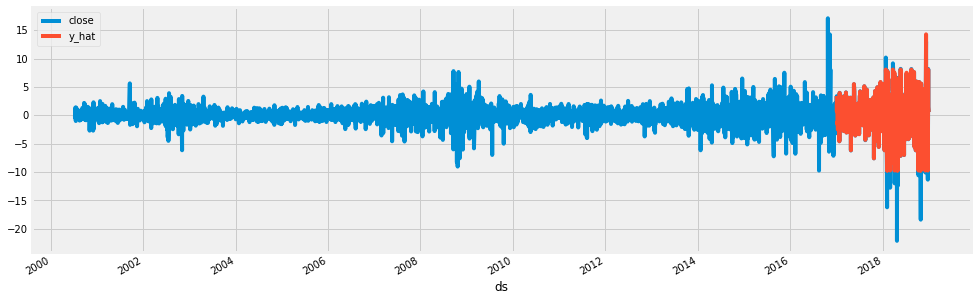

In [164]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [165]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

0.7807657416572054


## Autoregressive XGBoost

In [166]:
xg_df = diff_df.copy()


split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

In [167]:
xg_df.head()

,mean_ave,close
ds,,
2000-07-07,0.0,-0.12
2000-07-10,0.0,-0.12
2000-07-11,0.0,-0.44
2000-07-12,0.0,0.31
2000-07-13,0.0,-0.06


In [168]:
# X_train = xg_train.drop("close",axis=1)
# X_test = xg_test.drop("close",axis=1)

# y_train = xg_train['close']
# y_test = xg_test['close']

X_train = xg_train.drop('mean_ave',axis=1)
X_test = xg_test.drop("mean_ave", axis=1)

y_train = xg_train['close']
y_test = xg_test['close']

In [169]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(X_test)

In [170]:
X_train

array([[0.35818114],
       [0.35818114],
       [0.34625419],
       ...,
       [0.31494596],
       [0.40029817],
       [0.33842713]])

In [171]:
y_test

ds
2017-01-03     3.37
2017-01-04     0.68
2017-01-05     1.99
2017-01-06     1.87
2017-01-09    -0.04
              ...  
2018-12-24   -11.33
2018-12-26     6.40
2018-12-27     8.17
2018-12-28     1.47
2018-12-31     0.58
Name: close, Length: 502, dtype: float64

In [172]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[13:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

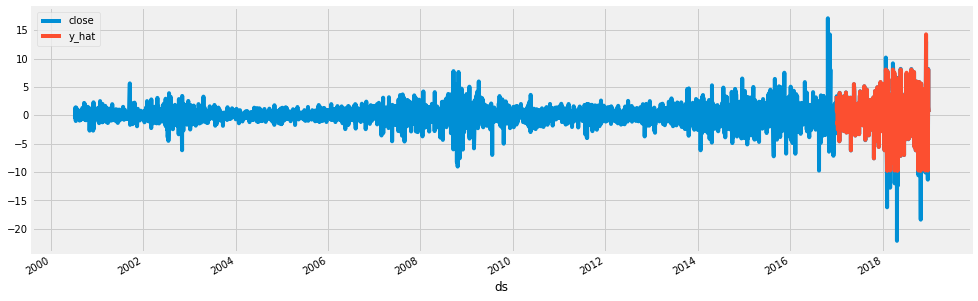

In [173]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [174]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

0.7807540736058787


## XGBoost with just mean_ave as a predictor

In [175]:
xg_df = diff_df.copy()


split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

In [176]:
xg_df.head()

,mean_ave,close
ds,,
2000-07-07,0.0,-0.12
2000-07-10,0.0,-0.12
2000-07-11,0.0,-0.44
2000-07-12,0.0,0.31
2000-07-13,0.0,-0.06


In [177]:
X_train = xg_train.drop("close",axis=1)
X_test = xg_test.drop("close",axis=1)

y_train = xg_train['close']
y_test = xg_test['close']

In [178]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(X_test)

In [179]:
X_train

array([[0.6],
       [0.6],
       [0.6],
       ...,
       [0.6],
       [0.6],
       [0.6]])

In [180]:
y_test

ds
2017-01-03     3.37
2017-01-04     0.68
2017-01-05     1.99
2017-01-06     1.87
2017-01-09    -0.04
              ...  
2018-12-24   -11.33
2018-12-26     6.40
2018-12-27     8.17
2018-12-28     1.47
2018-12-31     0.58
Name: close, Length: 502, dtype: float64

In [181]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[13:49:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

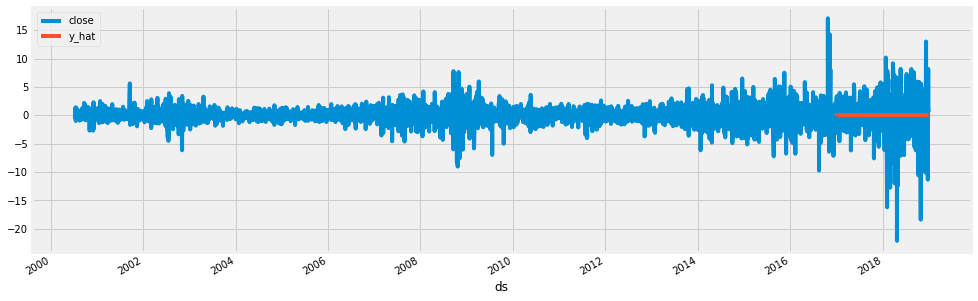

In [182]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [183]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

3.710605422055756


## XGBoost with time shifted, scaled data

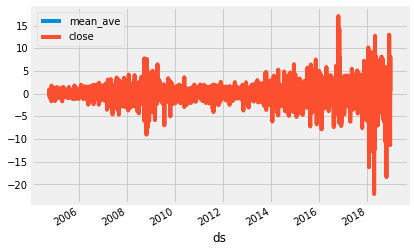

In [184]:
xg_df = shift_df.copy()

xg_df = xg_df.diff(1)

xg_df = xg_df.bfill()

split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

xg_df.plot()


In [185]:
xg_df.head()

,mean_ave,close
ds,,
2004-09-24,0.0,0.28
2004-09-27,0.0,0.28
2004-09-28,0.0,0.86
2004-09-29,0.0,-0.41
2004-09-30,0.0,0.69


In [186]:
X_train = xg_train
X_test = xg_test

y_train = xg_train['close']
y_test = xg_test['close']

In [187]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [188]:
X_train

array([[0.69230769, 0.35629545],
       [0.69230769, 0.35629545],
       [0.69230769, 0.37849215],
       ...,
       [0.69230769, 0.29659395],
       [0.69230769, 0.38423268],
       [0.69230769, 0.32070417]])

In [189]:
y_test

array([[ 0.47455033],
       [ 0.37160352],
       [ 0.42173747],
       [ 0.41714504],
       [ 0.34404899],
       [ 0.28281669],
       [ 0.3057788 ],
       [ 0.24952162],
       [ 0.41867585],
       [ 0.32797551],
       [ 0.45885955],
       [ 0.37236892],
       [ 0.33601225],
       [ 0.17068504],
       [ 0.27248374],
       [ 0.49751244],
       [ 0.28932262],
       [ 0.31993877],
       [ 0.28817451],
       [ 0.32912361],
       [ 0.38652889],
       [ 0.44087256],
       [ 0.37810945],
       [ 0.38614619],
       [ 0.35973976],
       [ 0.49138921],
       [ 0.41446613],
       [ 0.35361653],
       [ 0.38002296],
       [ 0.41714504],
       [ 0.3463452 ],
       [ 0.35744355],
       [ 0.35553004],
       [ 0.30463069],
       [ 0.38959051],
       [ 0.47416762],
       [ 0.23918867],
       [ 0.41446613],
       [ 0.29238423],
       [ 0.37504784],
       [ 0.34404899],
       [ 0.39609644],
       [ 0.29506315],
       [ 0.38231917],
       [ 0.34481439],
       [ 0

In [190]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[13:49:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

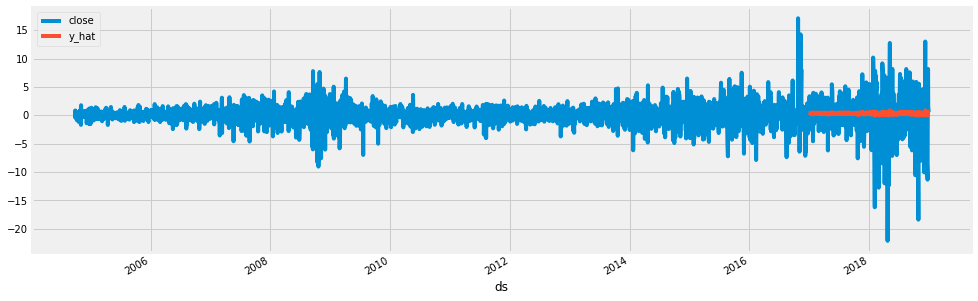

In [191]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [192]:
mse = mean_squared_error(y_test,xg_test['y_hat'])
rmse= np.sqrt(mse)

print(rmsexgboost)

3.710605422055756


## XGBoost with full features from lmt_df

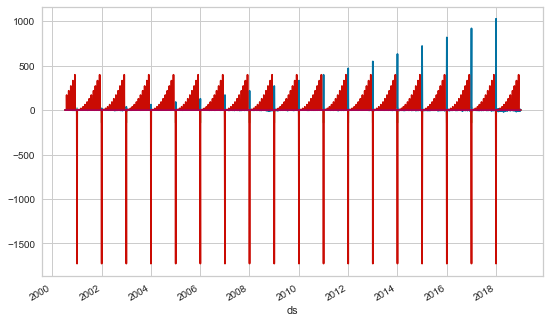

In [289]:
xg_df = lmt_df.copy()

xg_df = xg_df.diff(1)

xg_df = xg_df.bfill()

split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

xg_df.plot(legend=None)


In [290]:
xg_df.head()

,close,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_BNG,MAGCOL_BNG,...,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3,mean_ave
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,-0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,-0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
X_train = xg_train
X_test = xg_test

y_train = xg_train['close']
y_test = xg_test['close']

In [292]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [293]:
X_train

array([[0.35818114, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.35818114, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.34625419, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       ...,
       [0.31494596, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.40029817, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.33842713, 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ]])

In [294]:
y_test[:11]

array([[0.48825941],
       [0.38799851],
       [0.43682445],
       [0.43235184],
       [0.36116288],
       [0.30152814],
       [0.32389117],
       [0.26910175],
       [0.43384271],
       [0.34737234],
       [0.36079016]])

In [295]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[16:04:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

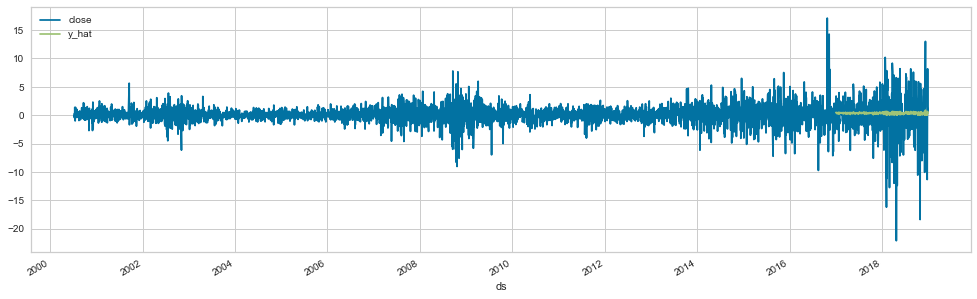

In [296]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [297]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

0.02923149682165223


In [298]:
from sklearn.model_selection import GridSearchCV
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}
# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()
# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                       scoring='neg_mean_squared_error', cv=4)
grid_mse.fit(X_train, y_train)
# Print the best parameters and lowest RMSE


[16:04:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=4, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.3, 0.7], 'max_depth': [2, 5],
                         'n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [299]:
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.007656703004271569


In [300]:
y_pred= grid_mse.predict(X_test)

y_train_df = pd.DataFrame (data=y_train, columns = ['y_train'])
y_test_df = pd.DataFrame (data=y_test, columns = ['y_test'])
# plt.scatter(y_test, y_hat)
# plt.show()

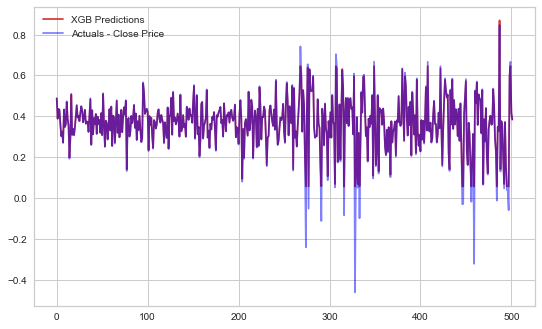

In [301]:
# fig = plt.figure(figsize=(15,6))
# ax = fig.add_axes([0,0,1,1])
plt.plot(y_pred[0:503], label='XGB Predictions', alpha=0.8, color='r')
plt.plot(y_test[0:503],label='Actuals - Close Price', alpha=0.5, color='blue')
plt.legend()
plt.savefig('xgboost_pred_actuals.png');
plt.show()

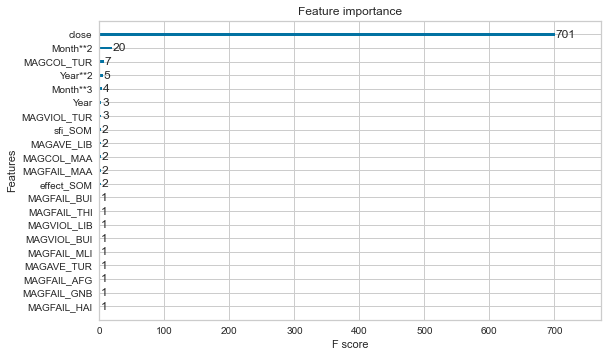

In [302]:
feat = xg_train.columns
dict_features = dict(enumerate(feat))

axsub = xgb.plot_importance(grid_mse.best_estimator_)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
# print(dict_features)
plt.savefig("featimport_xgb.png")
plt.show()

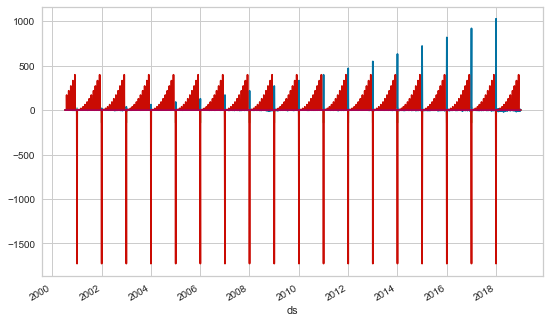

In [273]:
xg_df = lmt_df.copy()

xg_df = xg_df.diff(1)

xg_df = xg_df.bfill()

split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

xg_df.plot(legend=None)


In [274]:
xg_df.head()

,close,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,sfi_AFG,effect_AFG,legit_AFG,MAGFAIL_BNG,MAGCOL_BNG,...,sfi_YEM,effect_YEM,legit_YEM,Year,Month,Year**2,Year**3,Month**2,Month**3,mean_ave
ds,,,,,,,,,,,,,,,,,,,,,
2000-07-07,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,-0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,-0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
X_train = xg_train.drop('close',axis=1)
X_test = xg_test.drop('close',axis=1)

y_train = xg_train['close']
y_test = xg_test['close']

In [276]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [277]:
X_train

array([[0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       ...,
       [0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ],
       [0.5       , 0.5       , 0.5       , ..., 0.86144578, 0.81308851,
        0.6       ]])

In [278]:
y_test[:11]

array([[0.48825941],
       [0.38799851],
       [0.43682445],
       [0.43235184],
       [0.36116288],
       [0.30152814],
       [0.32389117],
       [0.26910175],
       [0.43384271],
       [0.34737234],
       [0.36079016]])

In [279]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[15:53:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

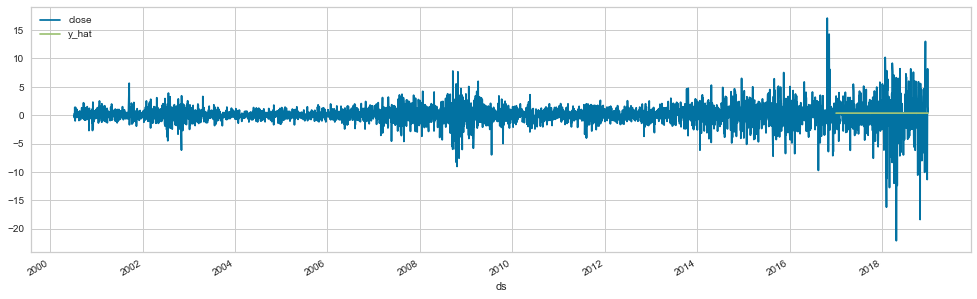

In [280]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [281]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

0.13843276731722307


In [282]:
from sklearn.model_selection import GridSearchCV
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}
# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()
# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                       scoring='neg_mean_squared_error', cv=4)
grid_mse.fit(X_train, y_train)
# Print the best parameters and lowest RMSE


[15:53:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=4, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.3, 0.7], 'max_depth': [2, 5],
                         'n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [283]:
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  0.05260464374760194


In [284]:
y_pred= grid_mse.predict(X_test)

y_train_df = pd.DataFrame (data=y_train, columns = ['y_train'])
y_test_df = pd.DataFrame (data=y_test, columns = ['y_test'])
# plt.scatter(y_test, y_hat)
# plt.show()

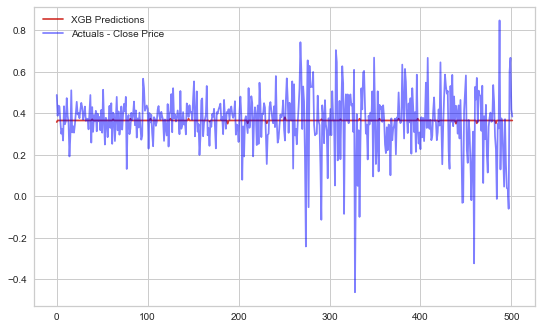

In [285]:
# fig = plt.figure(figsize=(15,6))
# ax = fig.add_axes([0,0,1,1])
plt.plot(y_pred[0:503], label='XGB Predictions', alpha=0.8, color='r')
plt.plot(y_test[0:503],label='Actuals - Close Price', alpha=0.5, color='blue')
plt.legend()
plt.savefig('xgboost_pred_actuals.png');
plt.show()

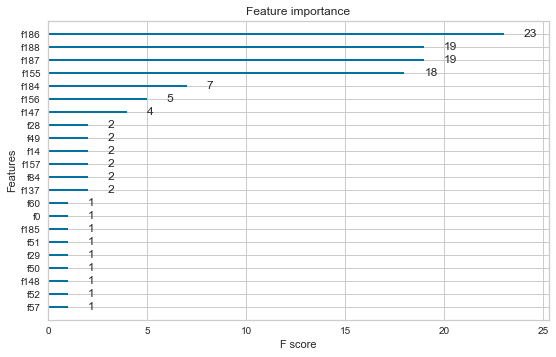

In [286]:
xgb.plot_importance(grid_mse.best_estimator_)
plt.show()

#grid_mse.best_estimator_.feature_importances_

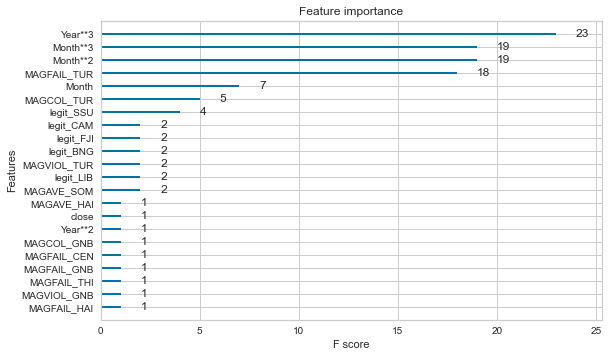

In [287]:
feat = xg_train.columns
dict_features = dict(enumerate(feat))

axsub = xgb.plot_importance(grid_mse.best_estimator_)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
# print(dict_features)
plt.show()

## XGBoost with Lasso sel_features

In [ ]:
xg_df = lmt_df.copy()

xg_df = xg_df.diff(1)

xg_df = xg_df.bfill()

split_date = '01-Jan-2017'
xg_train = xg_df.loc[xg_df.index <= split_date].copy()
xg_test = xg_df.loc[xg_df.index > split_date].copy()

xg_df.plot(legend=None)


In [ ]:
xg_df.head()

In [ ]:
X_train = xg_train[sel_features]
X_test = xg_test[sel_features]

y_train = xg_train['close']
y_test = xg_test['close']

In [ ]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [ ]:
X_train

In [ ]:
y_test

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
xg_test['y_hat'] = reg.predict(X_test)
xg_all = pd.concat([xg_test, xg_train], sort=False)
_ = xg_all[['close','y_hat']].plot(figsize=(15, 5))

In [ ]:
msexgboost = mean_squared_error(y_test,xg_test['y_hat'])
rmsexgboost= np.sqrt(msexgboost)

print(rmsexgboost)

## Finally: Deep Learning with LSTMs

## LSTM RNN

In [ ]:
diff_df['mean_ave'].plot()

In [ ]:
# first_df.plot()
diff_df.plot()

In [ ]:
diff_df.index

In [ ]:
# first_df.head(20)
diff_df.head(20)

In [ ]:
# train = first_df.loc[:'01-01-02016',]
train = diff_df.loc[:'01-01-02017',]


In [ ]:
train

In [ ]:
# test = first_df.loc['01-01-02016':]
test = diff_df.loc['01-01-02017':]

test

In [ ]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [ ]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled_mean', 'Scaled_close'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled_mean', 'Scaled_close'], index=test.index)
train_sc_df.head()

In [ ]:
# for s in range(1, 25):
for s in range(1, 31):
    train_sc_df['shift_mean_{}'.format(s)] = train_sc_df['Scaled_mean'].shift(s)
    # train_sc_df['shift_close_{}'.format(s)] = train_sc_df['Scaled_close'].shift(s)
    test_sc_df['shift_mean_{}'.format(s)] = test_sc_df['Scaled_mean'].shift(s)
    # test_sc_df['shift_close_{}'.format(s)] = test_sc_df['Scaled_close'].shift(s)

In [ ]:
X_train = train_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_train = train_sc_df.dropna()[['Scaled_close']]

X_test = test_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_test = test_sc_df.dropna()[['Scaled_close']]

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.plot(alpha=0.6, linewidth=6,legend=None)
plt.title("3 times lagged intensity of Adverse Regime Changes")
plt.xlabel("Year")
plt.ylabel("Scaled Magnitude Average")
# plt.savefig("shiftedseries.png")
plt.show()

In [ ]:
y_train.plot()

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0],30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)
# X_train_t = X_train.reshape(X_train.shape[0],30, 1)
# X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
K.clear_session()
model = Sequential()

model.add(LSTM(150, return_sequences=True, input_shape=(30,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=150))
model.add(Dropout(0.2))

opt= Adam(lr= 0.00001)

model.add(Dense(1))
model.compile(loss='mse', optimizer= opt, metrics="mse")


In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=5)

In [ ]:
model.fit(X_train_t, y_train, epochs=5000,
          batch_size=1, callbacks=early_stop, verbose=2)

In [ ]:
y_pred = model.predict(X_test_t, batch_size=1)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['actuals', 'predictions'])

In [ ]:
score = model.evaluate(X_test_t, y_test)

print("RMSE is " + str(np.sqrt(score)))

## RNN with first-order difference

In [ ]:
from sklearn.preprocessing import PowerTransformer

bc_df = first_df.copy()

pt = PowerTransformer()
bc_df['mean_ave'] = pt.fit_transform(bc_df['mean_ave'].values.reshape(-1, 1))
bc_df['mean_ave'].plot()
bc_df = bc_df.diff(1)

bc_df = bc_df.bfill()


In [ ]:
bc_df['mean_ave'].plot()

In [ ]:
bc_df.head(20)

In [ ]:
split_date = pd.Timestamp('01-01-2016')

In [ ]:
train = bc_df.loc[:'01-01-02018',]


In [ ]:
train

In [ ]:
test = bc_df.loc['01-01-02018':]

test

In [ ]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [ ]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled_mean', 'Scaled_close'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled_mean', 'Scaled_close'], index=test.index)
train_sc_df.head()

In [ ]:
# for s in range(1, 25):
for s in range(1, 7):
    train_sc_df['shift_mean_{}'.format(s)] = train_sc_df['Scaled_mean'].shift(s)
    # train_sc_df['shift_close_{}'.format(s)] = train_sc_df['Scaled_close'].shift(s)
    test_sc_df['shift_mean_{}'.format(s)] = test_sc_df['Scaled_mean'].shift(s)
    # test_sc_df['shift_close_{}'.format(s)] = test_sc_df['Scaled_close'].shift(s)

In [ ]:
X_train = train_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_train = train_sc_df.dropna()[['Scaled_close']]

X_test = test_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_test = test_sc_df.dropna()[['Scaled_close']]

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.plot(alpha=0.6, linewidth=6,legend=None)
plt.title("3 times lagged intensity of Adverse Regime Changes")
plt.xlabel("Year")
plt.ylabel("Scaled Magnitude Average")
# plt.savefig("shiftedseries.png")
plt.show()

In [ ]:
y_train.plot()

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0],6, 1)
X_test_t = X_test.reshape(X_test.shape[0], 6, 1)
# X_train_t = X_train.reshape(X_train.shape[0],30, 1)
# X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
K.clear_session()
model = Sequential()

model.add(LSTM(150, return_sequences=True, input_shape=(6,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=150))
model.add(Dropout(0.2))

opt= Adam(lr= 0.00001)

model.add(Dense(1))
model.compile(loss='mse', optimizer= opt, metrics="mse")


In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=5)

In [ ]:
model.fit(X_train_t, y_train, epochs=5000,
          batch_size=1, callbacks=early_stop, verbose=2)

In [ ]:
y_pred = model.predict(X_test_t, batch_size=1)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['actuals', 'predictions'])

In [ ]:
score = model.evaluate(X_test_t, y_test)

print("RMSE is " + str(np.sqrt(score)))

## RNN with more features(no mean_ave)

In [ ]:
from sklearn.preprocessing import PowerTransformer

feat_df = pct_df.copy()

feat_df = feat_df.diff(1)

feat_df = feat_df.bfill()
feat_df.head(10)

In [ ]:
feat_df['close'].plot()

In [ ]:
train = feat_df.loc[:'01-01-02017',]


In [ ]:
train

In [ ]:
test = feat_df.loc['01-01-02017':]

test

In [ ]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, index=train.index)
test_sc_df = pd.DataFrame(test_sc,index=test.index)
train_sc_df.head()

In [ ]:
test_sc_df

In [ ]:
train_sc_df.columns
# # for s in range(1, 25):
for col in train_sc_df[train_sc_df.columns[1:19]]:
  for s in range(1, 13):
    train_sc_df[str(col)+ ' shift_{}'.format(s)] = train_sc_df[col].shift(s)
    test_sc_df[str(col)+ ' shift_{}'.format(s)] = test_sc_df[col].shift(s)

train_sc_df

In [ ]:
#dropping non-lagged values from x, non-target values from y
X_train = train_sc_df.dropna().drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], axis=1)
y_train = train_sc_df.dropna()[[0]]

X_test = test_sc_df.dropna().drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], axis=1)
y_test = test_sc_df.dropna()[[0]]

# X_train = train_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
# y_train = train_sc_df.dropna()[['Scaled_close']]

# X_test = test_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
# y_test = test_sc_df.dropna()[['Scaled_close']]

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.plot(alpha=0.6, linewidth=6,legend=None)
plt.title("3 times lagged intensity of Adverse Regime Changes")
plt.xlabel("Year")
plt.ylabel("Scaled Magnitudes")
# plt.savefig("shiftedseries.png")
plt.show()

In [ ]:
y_train.plot()

In [ ]:
#converting to numpy arrays
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train.shape

In [ ]:
# converting to (num_samples, num_time_steps, num_features) for LSTM
X_train_t = X_train.reshape(X_train.shape[0],12, 18)
X_test_t = X_test.reshape(X_test.shape[0], 12, 18)
# X_train_t = X_train.reshape(X_train.shape[0],30, 1)
# X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
K.clear_session()
opt= RMSprop(lr= 0.00001)
model = Sequential()

# model.add(LSTM(50, return_sequences=True, input_shape=(6,9)))

model.add(LSTM(50, input_shape=(12,18)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))



model.add(Dense(1))
model.compile(loss='mse', optimizer= opt, metrics="mse")


In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=5)

In [ ]:
model.fit(X_train_t, y_train, epochs=5000,
          batch_size=1, callbacks=early_stop, verbose=2)

In [ ]:
y_pred = model.predict(X_test_t, batch_size=1)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['actuals', 'predictions'])

In [ ]:
score = model.evaluate(X_test_t, y_test)

print("RMSE is " + str(np.sqrt(score)))

## RNN with autoregression

In [ ]:
from sklearn.preprocessing import PowerTransformer

feat_df = pct_df.copy()

feat_df = feat_df.diff(1)

feat_df = feat_df.bfill()
feat_df.head(10)

In [ ]:
feat_df['close'].plot()

In [ ]:
train = feat_df.loc[:'01-01-02017',]


In [ ]:
train

In [ ]:
test = feat_df.loc['01-01-02017':]

test

In [ ]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, index=train.index)
test_sc_df = pd.DataFrame(test_sc,index=test.index)
train_sc_df.head()

In [ ]:
test_sc_df

In [ ]:
train_sc_df.columns
# # for s in range(1, 25):
for col in train_sc_df[train_sc_df.columns[:1]]:
  for s in range(1, 13):
    train_sc_df[str(col)+ ' shift_{}'.format(s)] = train_sc_df[col].shift(s)
    test_sc_df[str(col)+ ' shift_{}'.format(s)] = test_sc_df[col].shift(s)

train_sc_df

In [ ]:
X_train = train_sc_df.dropna().drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], axis=1)
y_train = train_sc_df.dropna()[[0]]

X_test = test_sc_df.dropna().drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], axis=1)
y_test = test_sc_df.dropna()[[0]]

# X_train = train_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
# y_train = train_sc_df.dropna()[['Scaled_close']]

# X_test = test_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
# y_test = test_sc_df.dropna()[['Scaled_close']]

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.plot(alpha=0.6, linewidth=6,legend=None)
plt.title("3 times lagged intensity of Adverse Regime Changes")
plt.xlabel("Year")
plt.ylabel("Scaled Magnitudes")
# plt.savefig("shiftedseries.png")
plt.show()

In [ ]:
y_train.plot()

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train.shape

In [ ]:
# (num_samples, num_time_steps, num_features)
X_train_t = X_train.reshape(X_train.shape[0],12, 19)
X_test_t = X_test.reshape(X_test.shape[0], 12, 19)
# X_train_t = X_train.reshape(X_train.shape[0],30, 1)
# X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
K.clear_session()
opt= RMSprop(lr= 0.00001)
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(12,19)))

# model.add(LSTM(50, input_shape=(12,19)))
# model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))



model.add(Dense(1))
model.compile(loss='mse', optimizer= opt, metrics="mse")


In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=5)

In [ ]:
model.fit(X_train_t, y_train, epochs=5000,
          batch_size=1, callbacks=early_stop, verbose=2)

In [ ]:
y_pred = model.predict(X_test_t, batch_size=1)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['actuals', 'predictions'])

In [ ]:
score = model.evaluate(X_test_t, y_test)

print("RMSE is " + str(np.sqrt(score)))

## LSTM RNN

In [ ]:
first_df.plot()

In [ ]:
first_df.index

In [ ]:
first_df.head(20)

In [ ]:
split_date = pd.Timestamp('01-01-2016')

In [ ]:
train = first_df.loc[:'01-01-02016',]


In [ ]:
train

In [ ]:
test = first_df.loc['01-01-02016':]

test

In [ ]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [ ]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled_mean', 'Scaled_close'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled_mean', 'Scaled_close'], index=test.index)
train_sc_df.head()

In [ ]:
for s in range(1, 13):
    train_sc_df['shift_mean_{}'.format(s)] = train_sc_df['Scaled_mean'].shift(s)
    train_sc_df['shift_close_{}'.format(s)] = train_sc_df['Scaled_close'].shift(s)
    test_sc_df['shift_mean_{}'.format(s)] = test_sc_df['Scaled_mean'].shift(s)
    test_sc_df['shift_close_{}'.format(s)] = test_sc_df['Scaled_close'].shift(s)

In [ ]:
X_train = train_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_train = train_sc_df.dropna()[['Scaled_close']]

X_test = test_sc_df.dropna().drop(['Scaled_mean', 'Scaled_close'], axis=1)
y_test = test_sc_df.dropna()[['Scaled_close']]

In [ ]:
X_train.head()

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:

X_train_t = X_train.reshape(X_train.shape[0],24, 1)
X_test_t = X_test.reshape(X_test.shape[0], 24, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping

In [ ]:
K.clear_session()
model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(24,1)))
model.add(Dropout(0.5))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=100))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=5)

In [ ]:
model.fit(X_train_t, y_train, epochs=5000,
          callbacks= early_stop,batch_size=128, verbose=2)

In [ ]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [ ]:
model.evaluate(X_test_t, y_test)

# TBD: Interpretation of best model(s): SHAP/LIME/ELI5 etc

# Conclusion

## Business recommendation 1:

## Business recommendation 2:

## Business recommendation 3:

## Future Work: